# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings(action="ignore")


from imblearn.over_sampling import SMOTE, RandomOverSampler, SVMSMOTE
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

# 1. Load Dataset

In [2]:
cell_df = pd.read_csv('../input/cell-customer-data/cell_customer_data.csv')
cell_df.describe()

,customer_id,revenue,mou,recurring_charge,director_assist,overage,roaming,minutes_delta,revenue_delta,dropped_calls,...,pcown,credit_card,accept_offer,new_user,existing_user,referrals,income,motorcycle,handset_price,churn
count,5.683700e+04,56663.000000,56663.000000,56663.000000,56663.000000,56663.000000,56663.000000,56429.000000,56429.000000,56837.000000,...,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000,56837.000000
mean,1.050449e+06,58.882421,525.921271,46.922484,0.894514,40.052302,1.244788,-10.378777,-1.148246,6.003088,...,0.185231,0.676197,0.017629,0.193941,0.138906,0.051850,4.331457,0.013108,35.696526,0.287770
std,2.919321e+04,44.595834,532.652850,23.958215,2.226850,97.723717,9.781468,253.404356,38.207510,8.968307,...,0.388489,0.467930,0.139140,0.395386,0.345851,0.302714,3.137535,0.113737,56.851802,0.452727
min,1.000001e+06,-6.167500,0.000000,-8.710000,0.000000,0.000000,0.000000,-3406.500000,-1107.740000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025076e+06,33.652500,158.750000,30.000000,0.000000,0.000000,0.000000,-83.500000,-7.065000,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050314e+06,48.507500,364.750000,44.990000,0.247500,2.500000,0.000000,-5.250000,-0.300000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,1.076178e+06,70.892500,721.750000,59.990000,0.990000,40.000000,0.257500,65.500000,1.575000,7.666666,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,39.989990,1.000000
max,1.099999e+06,1223.380000,7667.750000,399.990000,159.390000,4320.750000,1112.447500,4480.000000,1724.390000,221.666670,...,1.000000,1.000000,3.000000,1.000000,1.000000,35.000000,9.000000,1.000000,499.990000,1.000000


# 2. Exploring & Cleaning The Dataset

## 2.1. Overview

In [3]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56837 entries, 0 to 56836
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       56837 non-null  float64
 1   revenue           56663 non-null  float64
 2   mou               56663 non-null  float64
 3   recurring_charge  56663 non-null  float64
 4   director_assist   56663 non-null  float64
 5   overage           56663 non-null  float64
 6   roaming           56663 non-null  float64
 7   minutes_delta     56429 non-null  float64
 8   revenue_delta     56429 non-null  float64
 9   dropped_calls     56837 non-null  float64
 10  blocked_calls     56837 non-null  float64
 11  unanswered        56837 non-null  float64
 12  customer_care     56837 non-null  float64
 13  conference        56837 non-null  float64
 14  mou_received      56837 non-null  float64
 15  outcalls          56837 non-null  float64
 16  incalls           56837 non-null  float6

In [4]:
# change dtype for numerical variables
for i in ['accept_offer','months','uniq_subs','active_subs','referrals','income']:
    cell_df[i] = cell_df[i].astype('float64')

In [5]:
cell_df.isnull().sum()

customer_id           0
revenue             174
mou                 174
recurring_charge    174
director_assist     174
overage             174
roaming             174
minutes_delta       408
revenue_delta       408
dropped_calls         0
blocked_calls         0
unanswered            0
customer_care         0
conference            0
mou_received          0
outcalls              0
incalls               0
peaks                 0
off_peaks             0
call_forwarding       0
call_waiting          0
months                0
uniq_subs             0
active_subs           0
phones                1
models                1
eqp_days              1
age1                991
age2                991
children              0
credit_a              0
credit_aa             0
rural                 0
suburban              0
town                  0
refurbished           0
web_capable           0
truck                 0
rv                    0
job_prof              0
job_clerical          0
job_crafts      

In [6]:
# removing missing values
cell_df.dropna(inplace=True)

# replace 0 in age with mean
nonzero_mean_age1= cell_df[cell_df['age1'] != 0]['age1'].mean()
nonzero_mean_age2 = cell_df[cell_df['age2'] != 0]['age2'].mean()

cell_df['age1']= cell_df['age1'].mask(cell_df['age1']==0).fillna(nonzero_mean_age1)
cell_df['age2']= cell_df['age2'].mask(cell_df['age2']==0).fillna(nonzero_mean_age1)

# remove negative revenue values
cell_df = cell_df[(cell_df['revenue'] >= 0) & (cell_df['recurring_charge'] >= 0) & (cell_df['eqp_days'] >= 0)]
# cell_df = cell_df[cell_df['recurring_charge'] >= 0]


# remove customer id
df_clean = cell_df.iloc[:,1:]

df_clean.describe()

,revenue,mou,recurring_charge,director_assist,overage,roaming,minutes_delta,revenue_delta,dropped_calls,blocked_calls,...,pcown,credit_card,accept_offer,new_user,existing_user,referrals,income,motorcycle,handset_price,churn
count,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,...,55354.000000,55354.00000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000,55354.000000
mean,58.714187,524.597208,46.917896,0.889304,39.727395,1.233728,-10.541728,-1.140731,5.998820,4.074478,...,0.188677,0.68855,0.017686,0.194602,0.139340,0.051288,4.410070,0.013387,35.523188,0.286321
std,44.344779,530.467561,23.859120,2.215163,97.112624,9.778971,251.732014,37.980369,8.959222,10.709625,...,0.391255,0.46309,0.139403,0.395898,0.346304,0.265212,3.109951,0.114924,56.690614,0.452045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3406.500000,-1107.740000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.643125,159.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-6.996875,0.666667,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,48.370000,364.500000,44.990000,0.247500,2.500000,0.000000,-5.250000,-0.300000,3.000000,1.000000,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,70.645625,719.500000,59.990000,0.990000,39.750000,0.257500,65.000000,1.552500,7.666666,3.666667,...,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,39.989990,1.000000
max,1223.380000,7667.750000,399.990000,159.390000,4320.750000,1112.447500,4480.000000,1724.390000,221.666670,324.666660,...,1.000000,1.00000,3.000000,1.000000,1.000000,16.000000,9.000000,1.000000,499.990000,1.000000


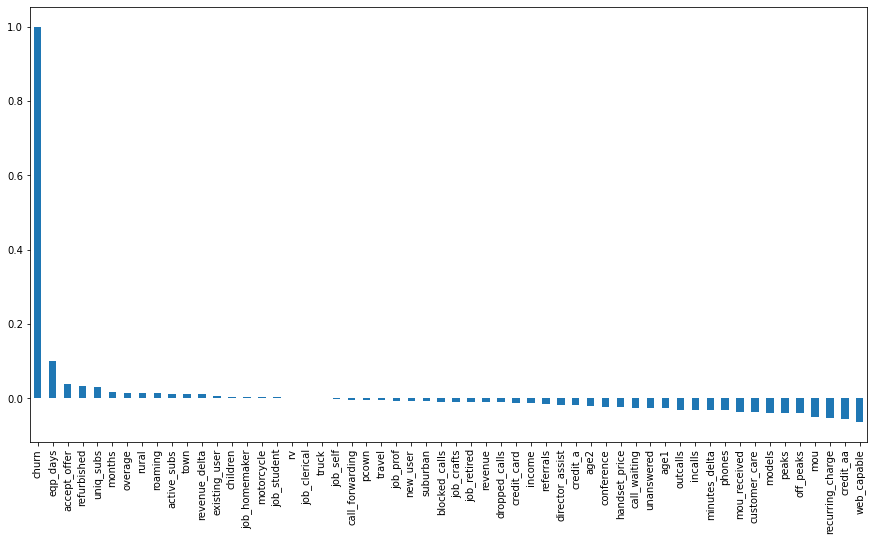

In [7]:
plt.figure(figsize=(15,8))
ax = df_clean.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

eqp_days(Number of days of current phone), accept_offer(Number of previous retention offers accepted) and refurbished(Phone is refurbished) seem to be positively correlated with churn.

web_capable(Phone has web capabilities), credit_aa(Highest credit rating is AA) and recurring_charge(Total recurring charge, aka the basic monthly rate for the customer’s voice plan) negatively correlated with churn.

Having technical difficulties and high usage seem to have a negative correlation with churn.

In [8]:
numerical_data = []
categorical_data = []
for x in df_clean.columns:
    if df_clean[x].dtype == "float64":
        numerical_data.append(x)  
    if df_clean[x].dtype == "int64":
        categorical_data.append(x)

In [9]:
numerical_df = pd.DataFrame()
categorical_df = pd.DataFrame()
for i in numerical_data:
    numerical_df[i] = df_clean[i]

for i in categorical_data:
    categorical_df[i] = df_clean[i]

## 2.2. Target veriable

Goal is to predict churn with target balance:


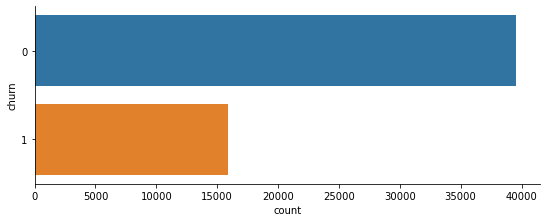

In [10]:
ax = sns.catplot(y="churn", kind="count", data=df_clean, height=3, aspect=2.5, orient='h')

## 2.3. Numerical features

In [11]:
numerical_df.info()
numerical_df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55354 entries, 0 to 56836
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           55354 non-null  float64
 1   mou               55354 non-null  float64
 2   recurring_charge  55354 non-null  float64
 3   director_assist   55354 non-null  float64
 4   overage           55354 non-null  float64
 5   roaming           55354 non-null  float64
 6   minutes_delta     55354 non-null  float64
 7   revenue_delta     55354 non-null  float64
 8   dropped_calls     55354 non-null  float64
 9   blocked_calls     55354 non-null  float64
 10  unanswered        55354 non-null  float64
 11  customer_care     55354 non-null  float64
 12  conference        55354 non-null  float64
 13  mou_received      55354 non-null  float64
 14  outcalls          55354 non-null  float64
 15  incalls           55354 non-null  float64
 16  peaks             55354 non-null  float6

revenue             26665
mou                  8271
recurring_charge     5699
director_assist       144
overage              2093
roaming              3774
minutes_delta        6243
revenue_delta       22331
dropped_calls         283
blocked_calls         369
unanswered            853
customer_care         178
conference             83
mou_received        34692
outcalls              785
incalls               466
peaks                1875
off_peaks            1708
call_forwarding        30
call_waiting          234
months                 56
uniq_subs              14
active_subs            11
phones                 21
models                 12
eqp_days             1427
age1                   42
age2                   43
accept_offer            4
referrals              12
income                 10
handset_price          16
dtype: int64

In [12]:
def distplot(feature, df, color='g'):
    plt.figure(figsize=(12,4))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(df[feature], color= color)
    
def kdeplot(feature):
    plt.figure(figsize=(12, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df_clean[df_clean['churn'] == 0][feature].dropna(), color= 'navy', label = 'Churn : No')
    ax1 = sns.kdeplot(df_clean[df_clean['churn'] == 1][feature].dropna(), color= 'orange', label = 'Churn : Yes')
    plt.legend()
    
def barplot(feature1, feature2, df):
    g = sns.FacetGrid(df, col=feature1, height=4, aspect=.9)
    ax = g.map(sns.barplot, feature2, "churn", palette = "Blues_d")

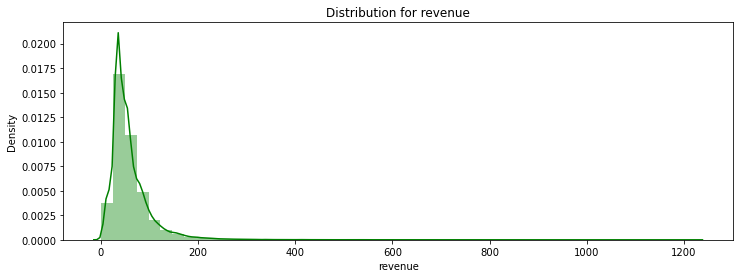

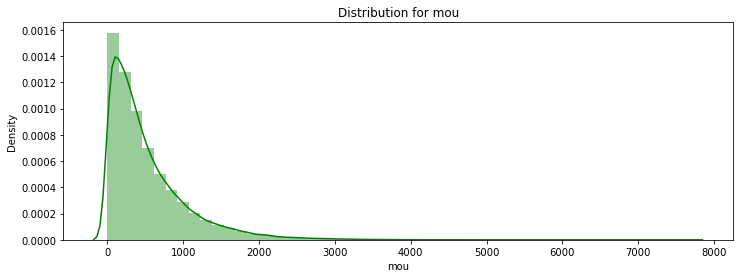

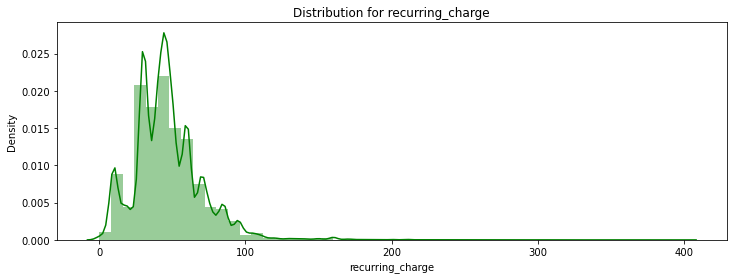

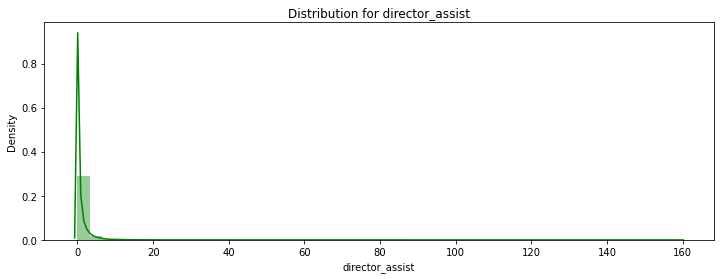

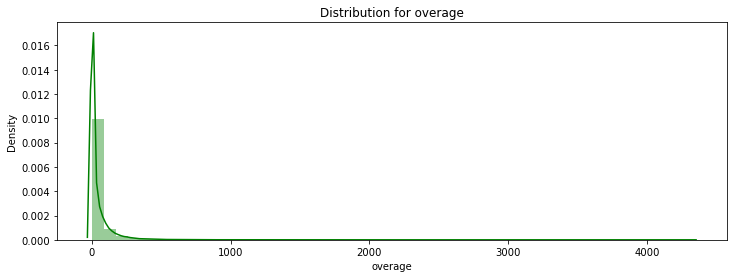

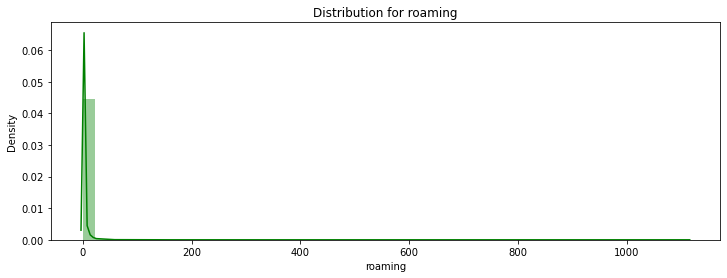

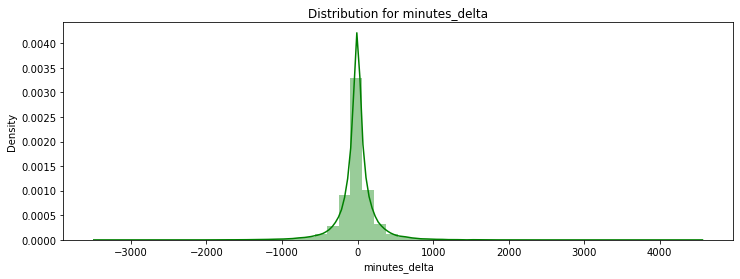

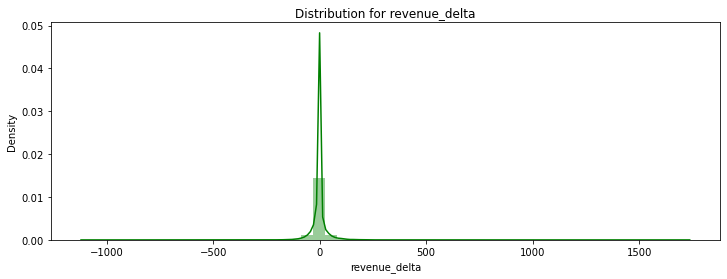

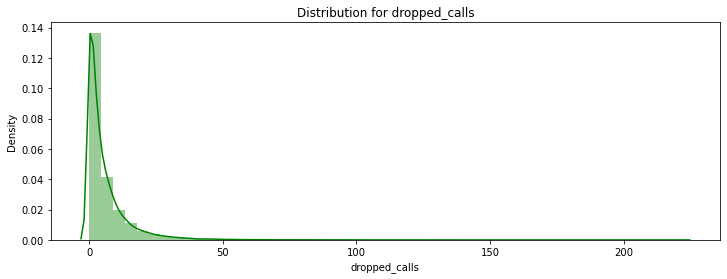

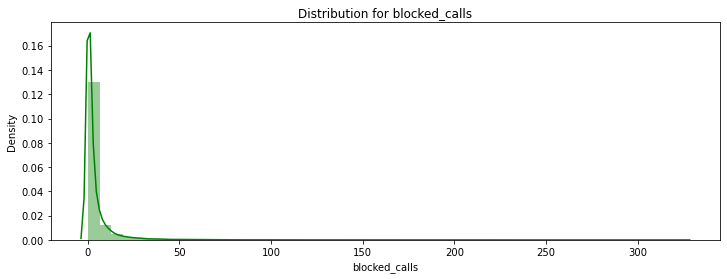

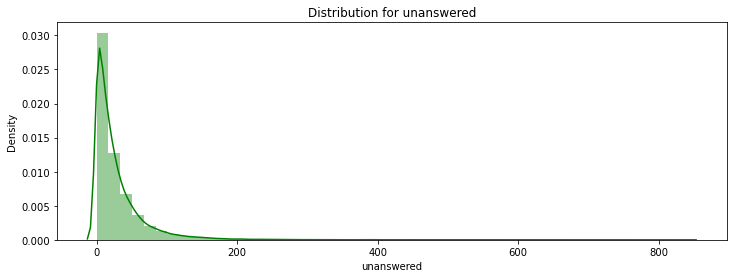

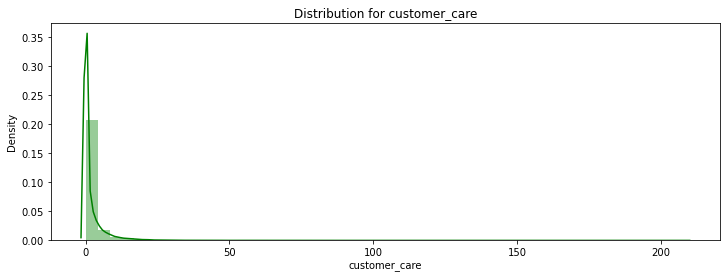

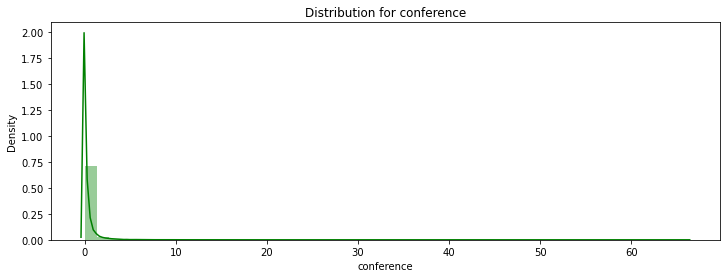

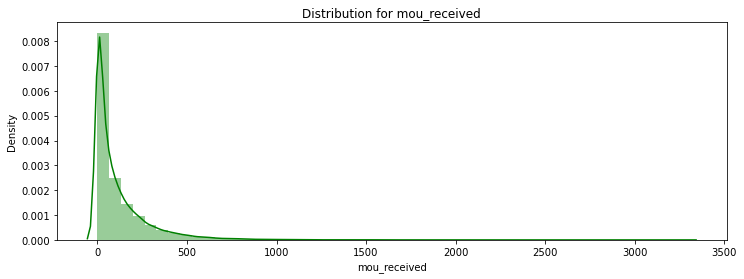

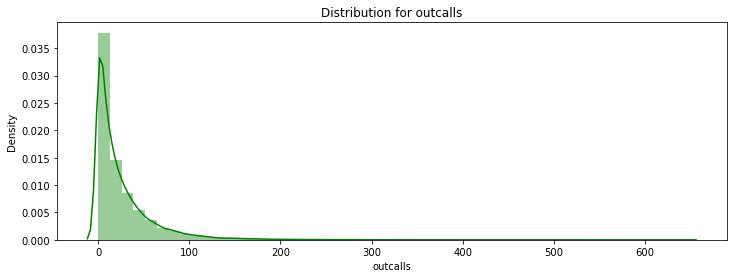

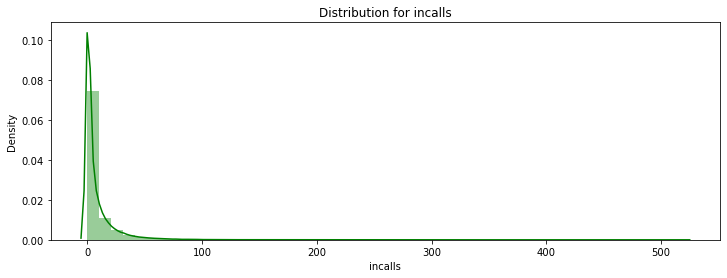

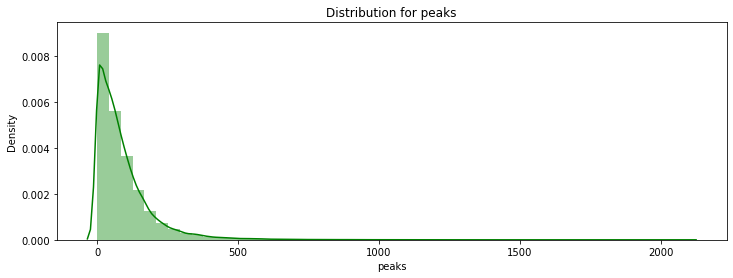

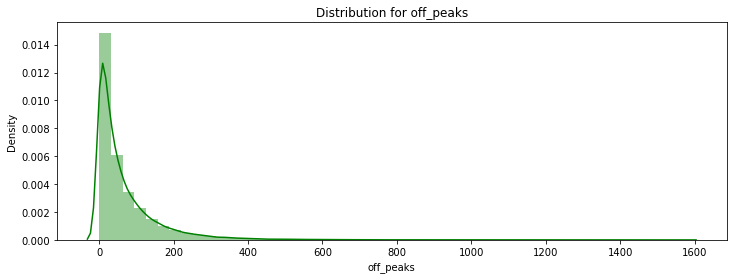

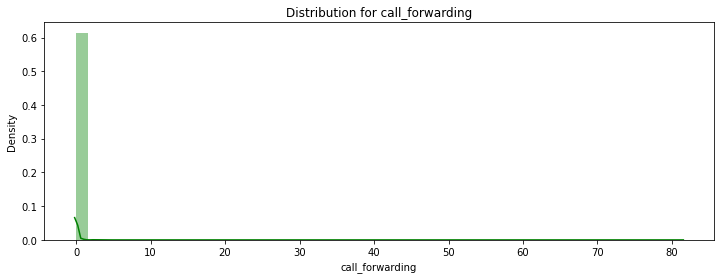

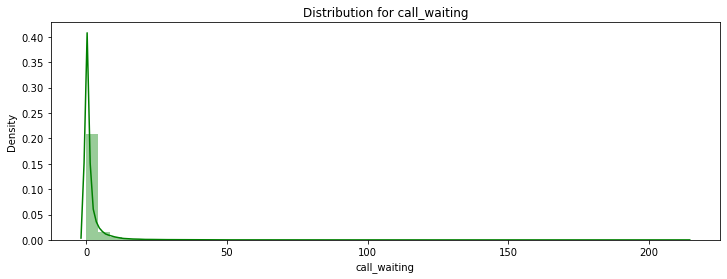

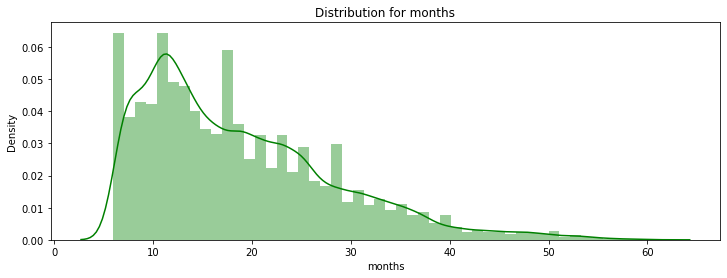

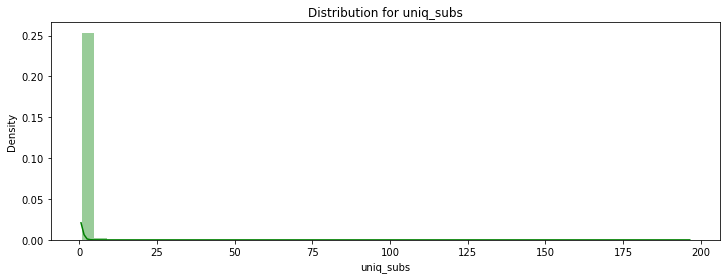

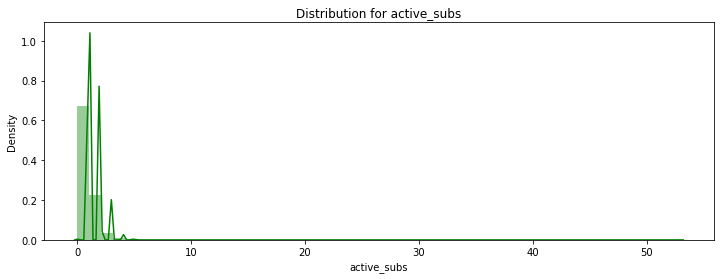

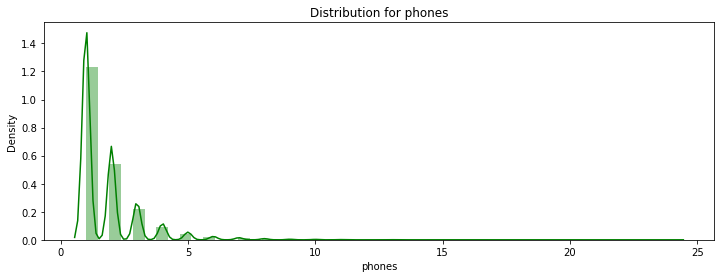

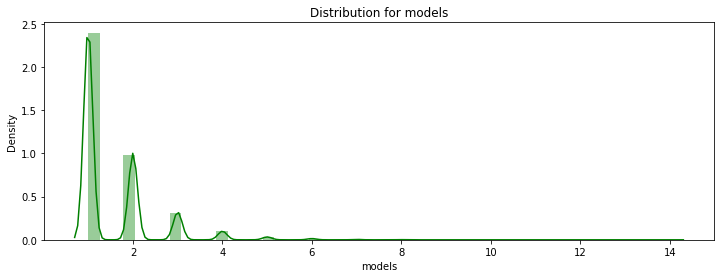

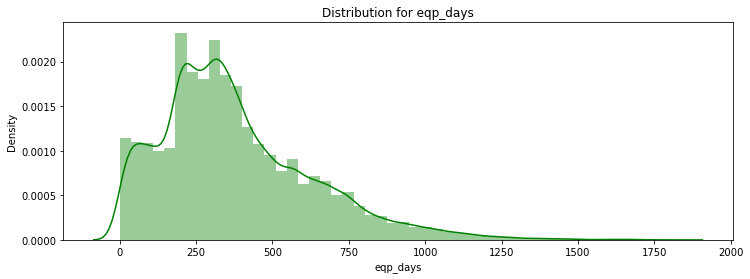

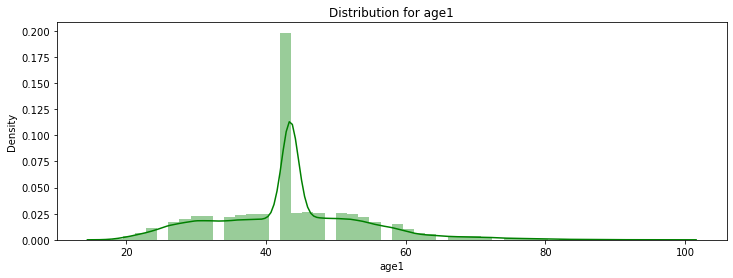

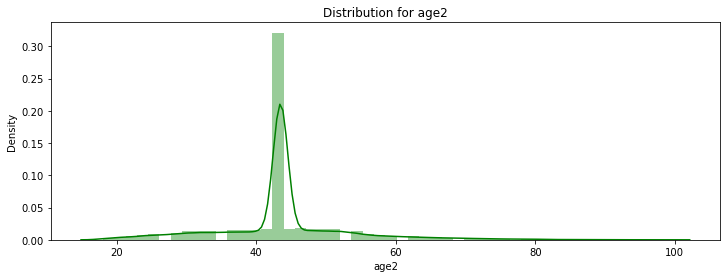

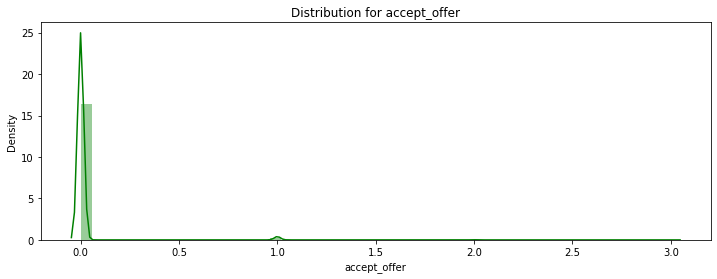

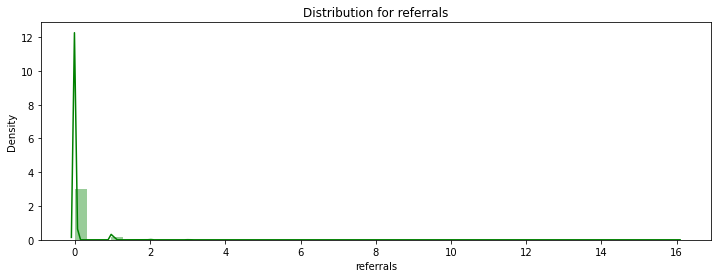

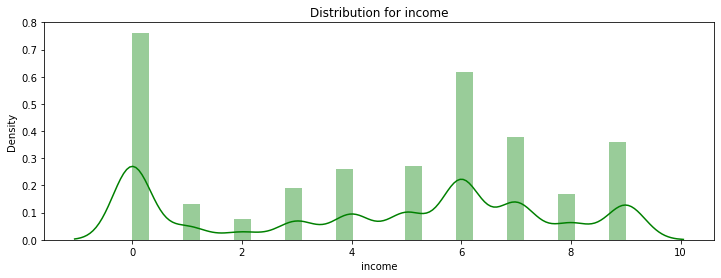

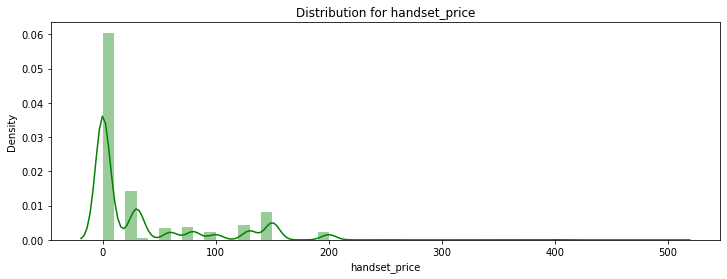

In [13]:
for feat in list(numerical_df): 
    distplot(feat, numerical_df)

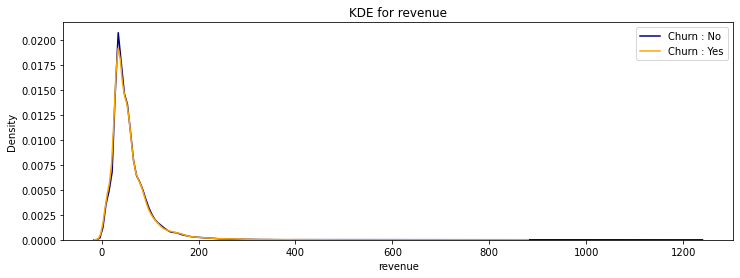

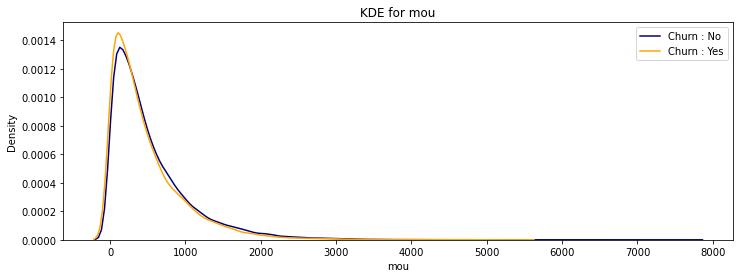

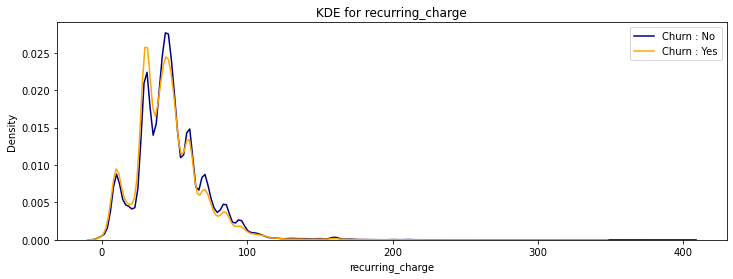

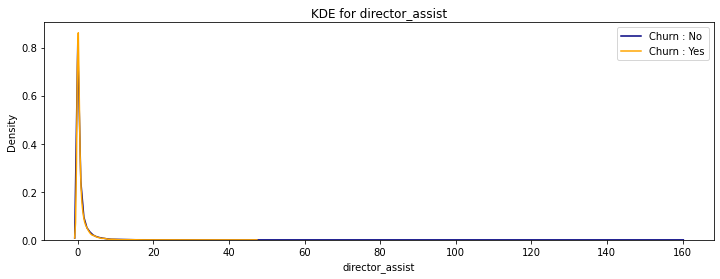

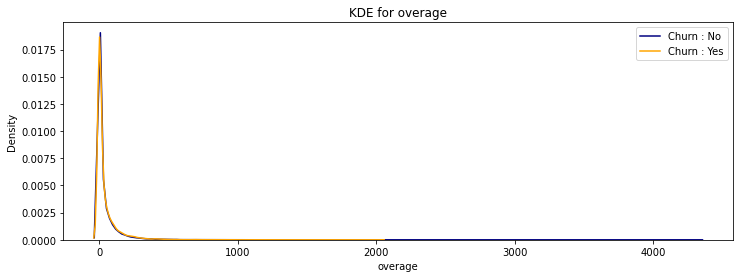

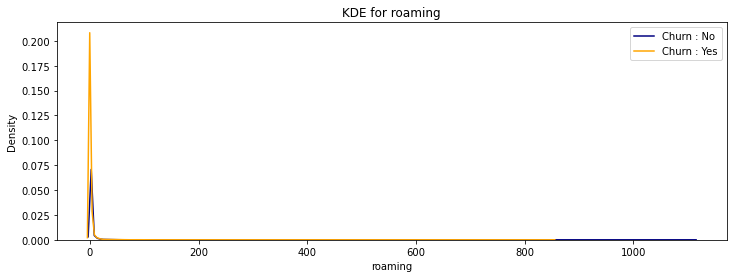

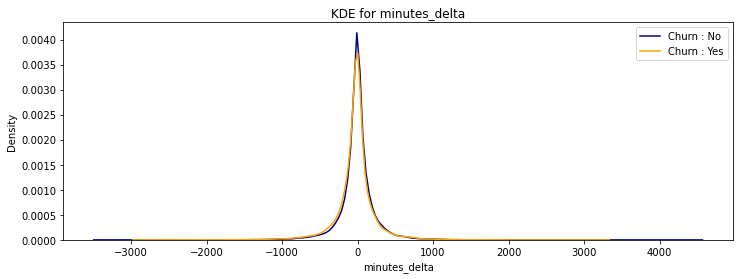

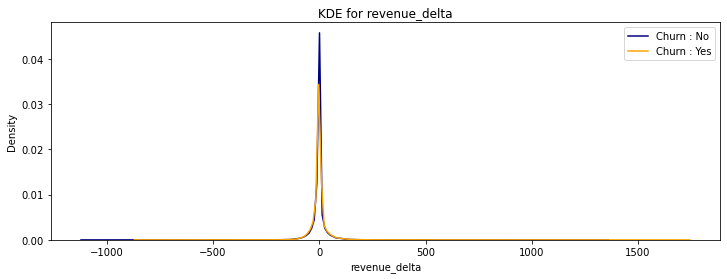

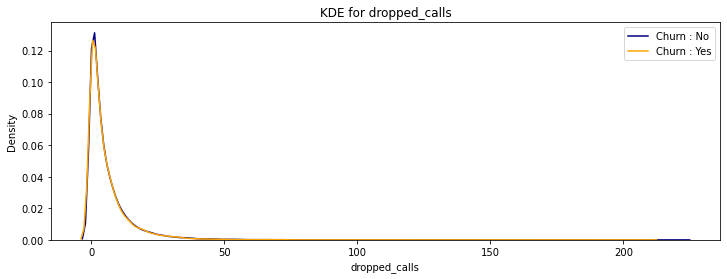

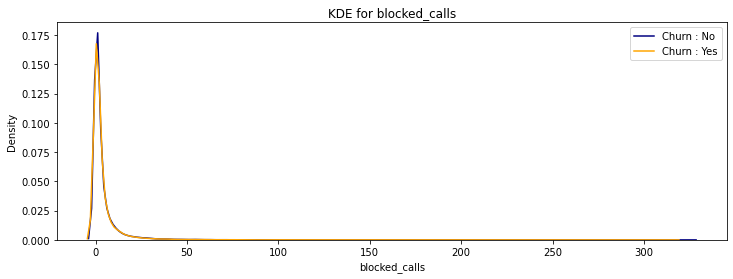

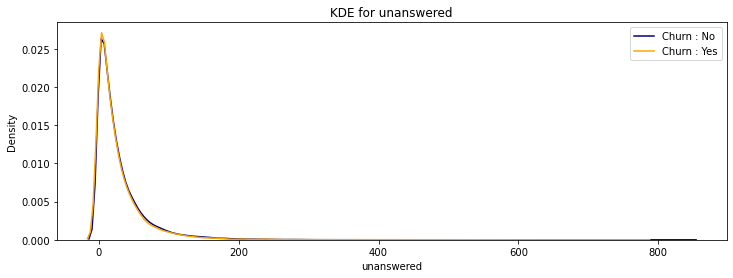

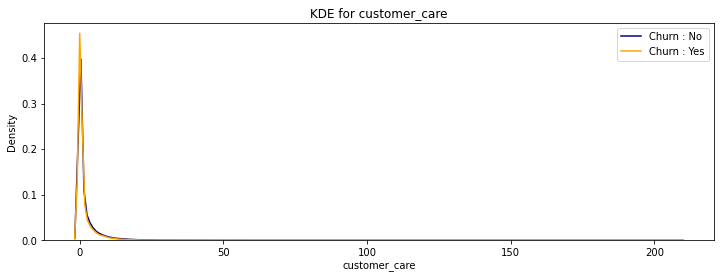

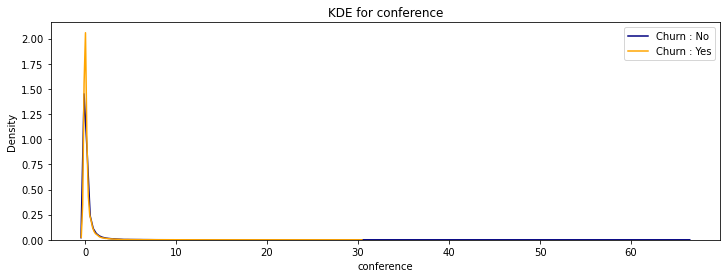

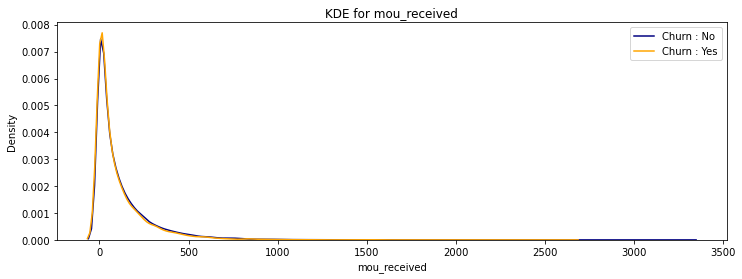

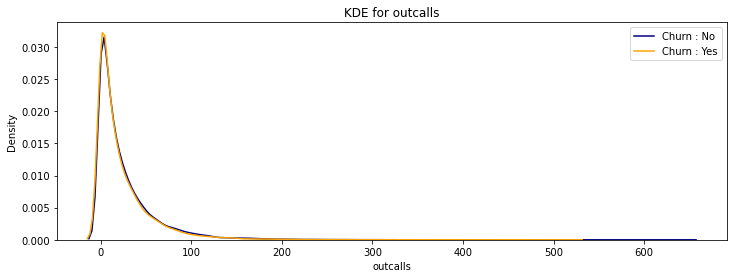

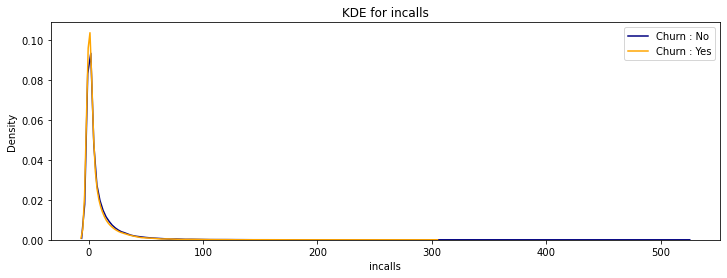

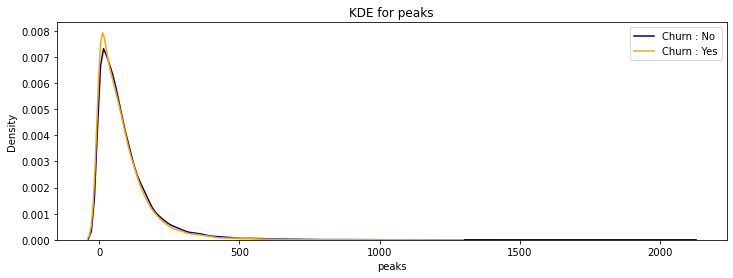

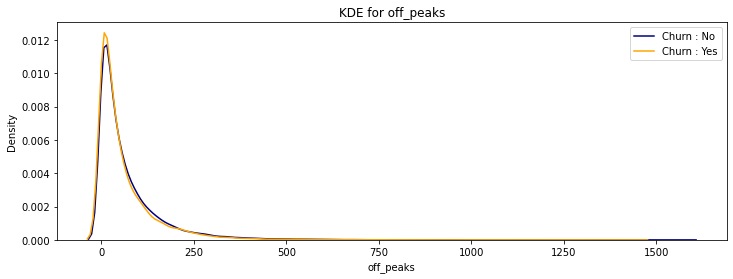

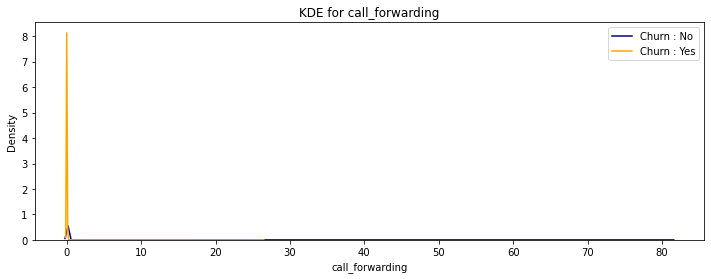

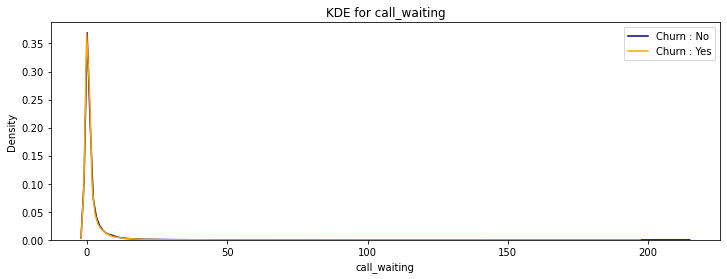

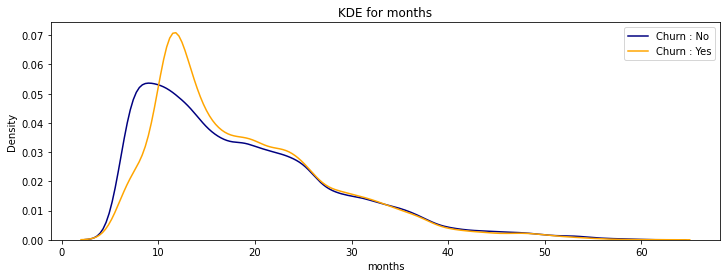

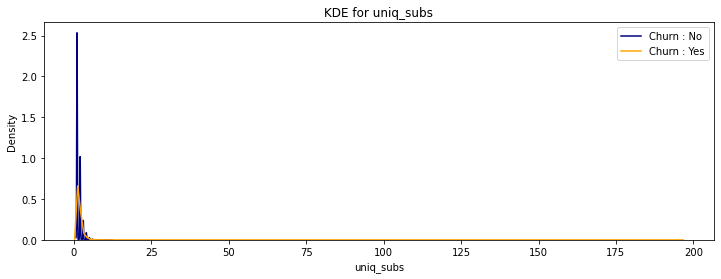

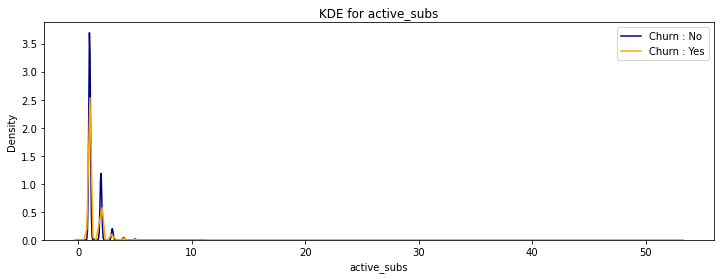

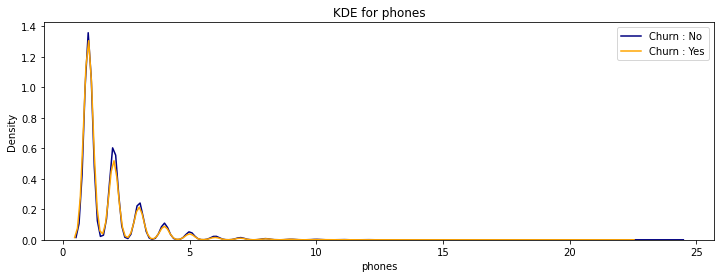

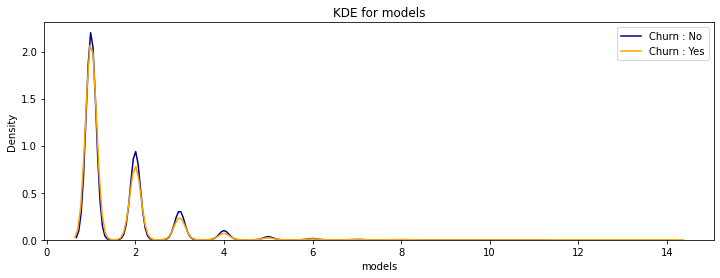

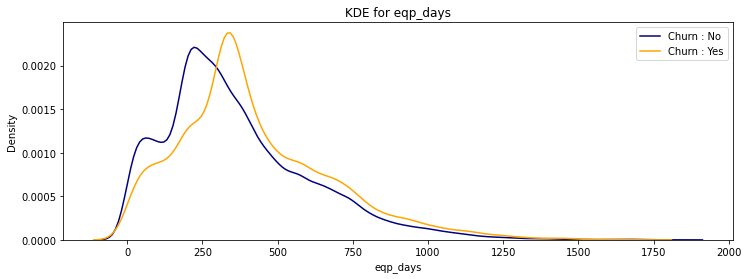

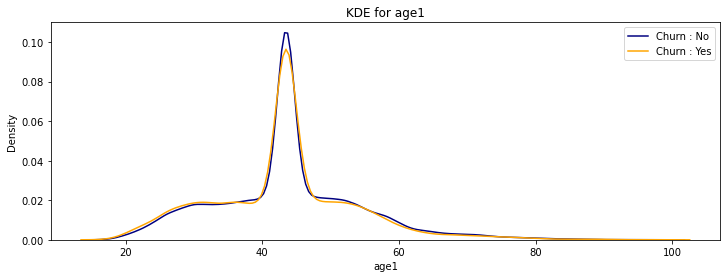

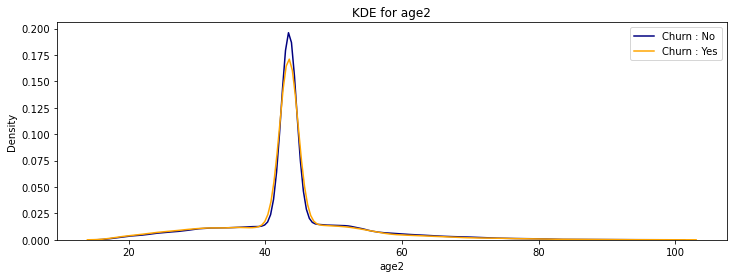

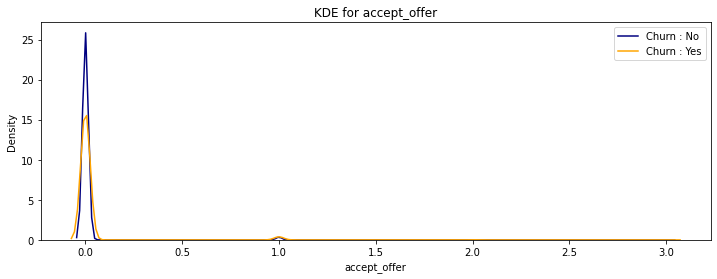

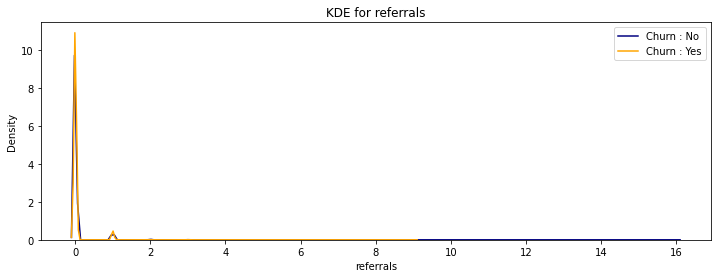

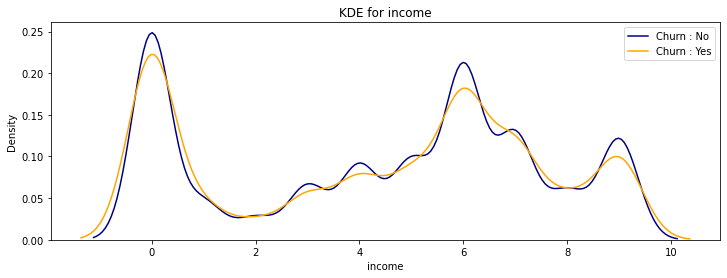

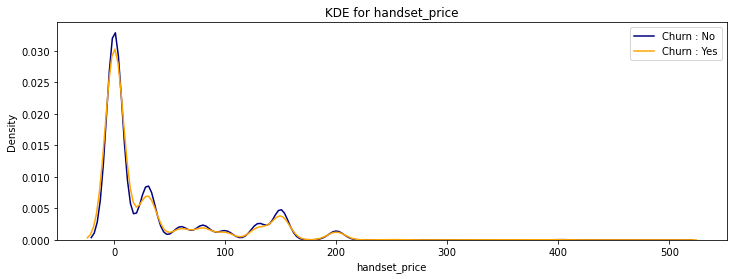

In [14]:
for col in list(numerical_df.columns):
    kdeplot(col)

From KDE plots above we can see the likelihood of churn could be impacted by: 

* Month in service is one of the key variables in churn
* Number of days in current phone
* Basic Monthly Rate for the plan
* Monthly Minutes

## 2.4. Categorical features

There are 23 categorical features:
* All binary
* Can be broken down to 

    - oppupational (job_prof, job_clearical, job_crafts, job_student, job_homemaker, job_retired, job_self)
    - geographical (rural, suburban, town)
    - financial (credit_a, credit_aa, credit_card)
    - user_type (new_user, existing_user)
    - phone_type (refurbished, web_capable)
    - other

In [15]:
categorical_df.nunique()

children         2
credit_a         2
credit_aa        2
rural            2
suburban         2
town             2
refurbished      2
web_capable      2
truck            2
rv               2
job_prof         2
job_clerical     2
job_crafts       2
job_student      2
job_homemaker    2
job_retired      2
job_self         2
travel           2
pcown            2
credit_card      2
new_user         2
existing_user    2
motorcycle       2
churn            2
dtype: int64

In [16]:
categorical_df.head()

,children,credit_a,credit_aa,rural,suburban,town,refurbished,web_capable,truck,rv,...,job_homemaker,job_retired,job_self,travel,pcown,credit_card,new_user,existing_user,motorcycle,churn
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,1,0,0,0
5,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


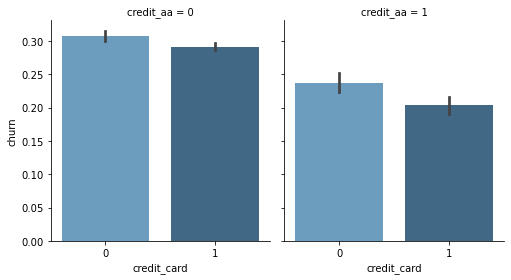

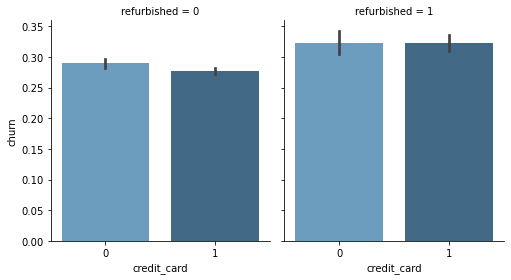

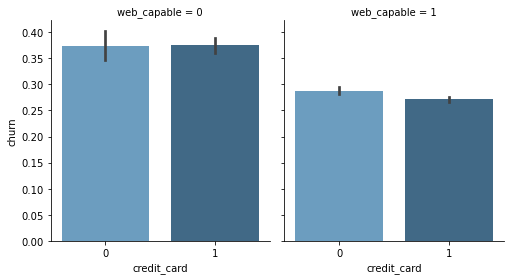

In [17]:
for col in ['credit_aa', 'refurbished', 'web_capable']:
    barplot(col, 'credit_card', df_clean)

# 3. Data Preprocessing

## 3.1 Correlation between features

### Correlation heatmap

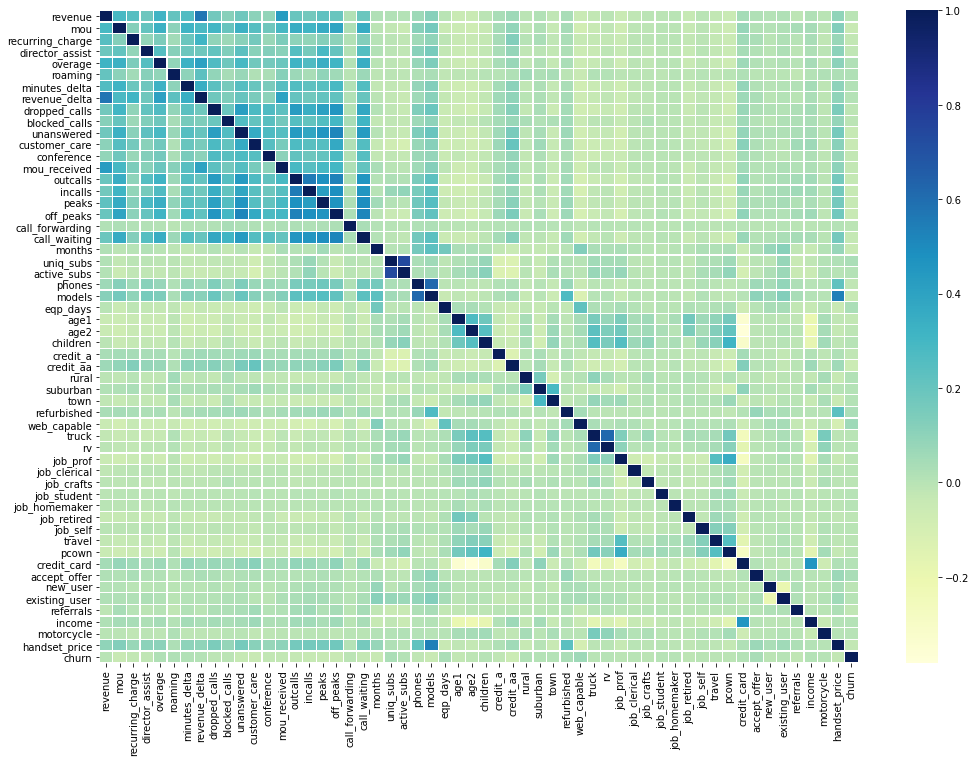

In [18]:
plt.figure(figsize=(17, 12))
corr = df_clean.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## 3.2 Feature Importance by RF Classifier

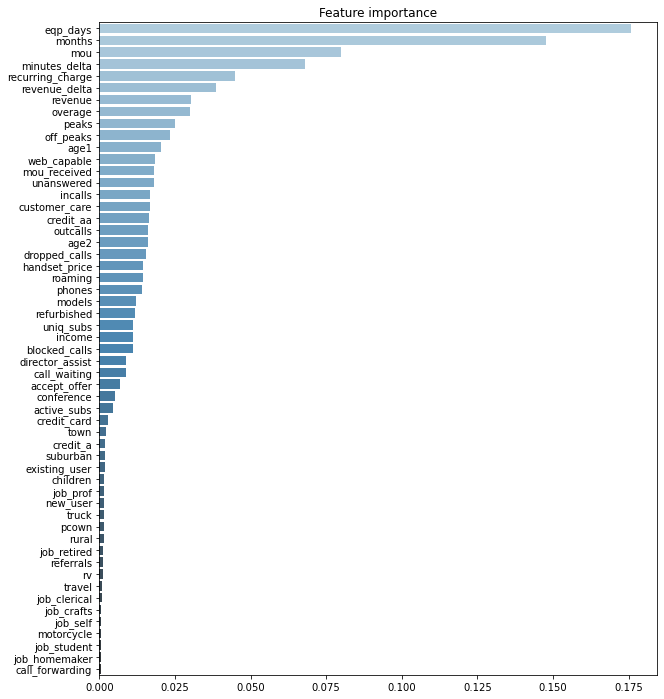

In [19]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 1500, 'max_depth': 8}
# Fit RandomForest Classifier
x, y = df_clean.iloc[:,:-1], df_clean['churn']
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [20]:
imp_df = pd.DataFrame(imp, columns=['importance'])
imp_df = imp_df.iloc[:-25,:]

imp_df_rdc = imp_df[imp_df['importance'] > 0.01]
imp_feature = imp_df_rdc.index.tolist()
df_imp_fea = df_clean[imp_feature]
df_imp_fea

,eqp_days,months,mou,minutes_delta,recurring_charge,revenue_delta,revenue,overage,peaks,off_peaks,...,age2,dropped_calls,handset_price,roaming,phones,models,refurbished,uniq_subs,income,blocked_calls
0,320.0,14.0,290.00,-163.00,59.990,-0.4250,47.9150,0.00,0.000000,0.000000,...,43.454591,0.000000,79.98999,0.0000,2.0,1.0,0,1.0,6.0,0.000000
1,266.0,9.0,1506.75,1187.25,74.575,156.8275,193.6225,196.25,195.333330,190.666670,...,43.454591,13.666667,79.98999,9.5150,2.0,2.0,0,2.0,6.0,4.666666
2,451.0,15.0,148.50,-29.50,10.000,-4.2725,14.2725,11.25,23.333334,18.666666,...,38.000000,0.333333,0.00000,0.8975,1.0,1.0,1,2.0,6.0,2.000000
4,131.0,12.0,1992.25,204.75,84.990,51.0225,156.4375,255.00,429.666660,210.000000,...,44.000000,31.000000,149.98999,0.0000,2.0,1.0,0,1.0,8.0,1.000000
5,491.0,39.0,301.25,25.75,22.165,-11.6775,24.9275,0.00,117.666664,49.666668,...,42.000000,0.000000,29.98999,0.0000,2.0,2.0,1,3.0,2.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56832,381.0,26.0,556.50,47.50,94.990,-2.6275,97.1075,45.50,99.666664,32.333332,...,43.454591,4.000000,29.98999,0.0000,2.0,2.0,0,4.0,0.0,6.000000
56833,222.0,7.0,458.50,11.50,52.490,-0.2250,54.2150,0.00,127.666664,64.000000,...,22.000000,1.333333,0.00000,0.0000,1.0,1.0,0,3.0,4.0,10.000000
56834,878.0,29.0,6.25,11.75,29.990,0.0000,29.9900,0.00,1.000000,1.000000,...,58.000000,0.000000,0.00000,0.0000,1.0,1.0,0,1.0,4.0,0.000000
56835,295.0,10.0,131.50,-2.50,10.000,10.4625,21.4875,54.75,41.666668,6.333334,...,52.000000,0.333333,0.00000,1.1750,1.0,1.0,0,9.0,7.0,2.333333


## 3.3 Feature Scalling

In [21]:
# Clearify x and y
x, y = df_clean.iloc[:,:-1], df_clean['churn']
x_imp, y_imp = df_imp_fea, df_clean['churn']

In [22]:
# # MinMaxScaler
# features = x.columns.values
# scaler = MinMaxScaler()
# scaler.fit(x)
# x = pd.DataFrame(scaler.transform(x))
# x.columns = features

# for feat in list(df_imp_fea): 
#     distplot(feat, x, color='gray')

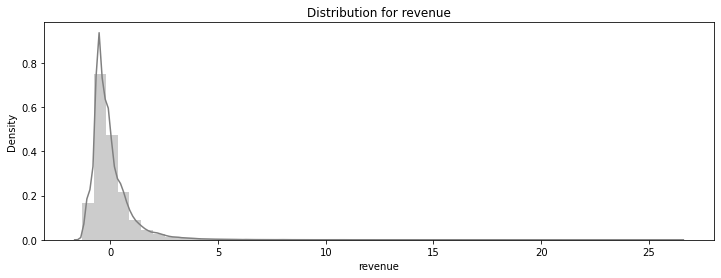

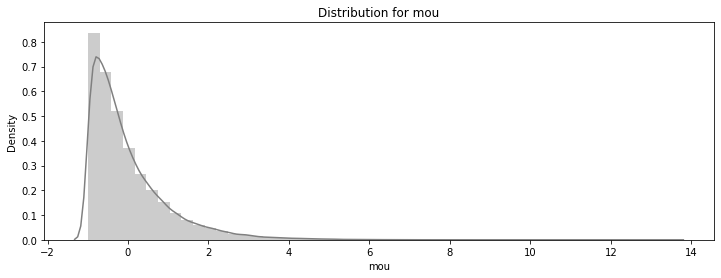

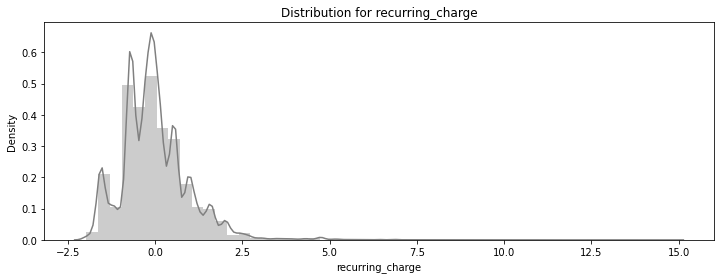

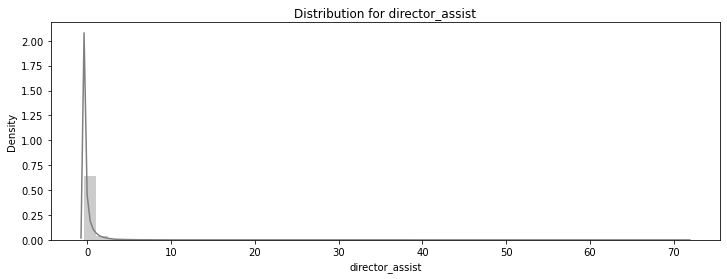

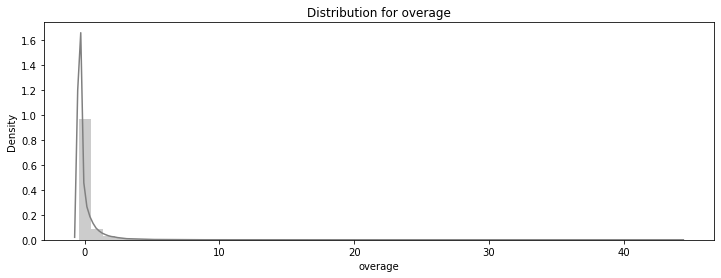

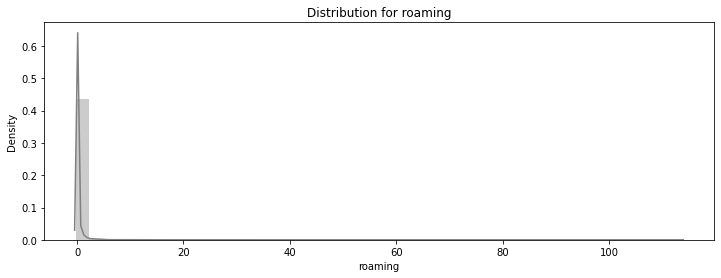

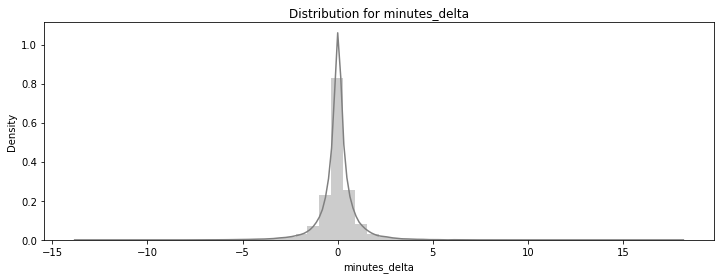

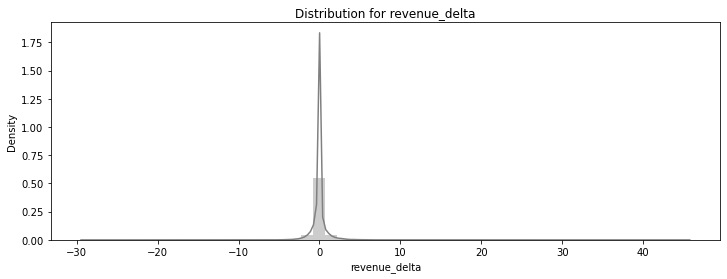

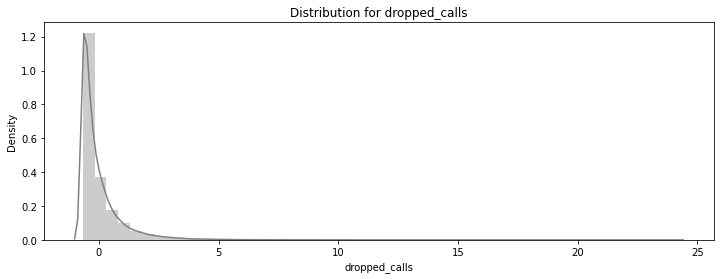

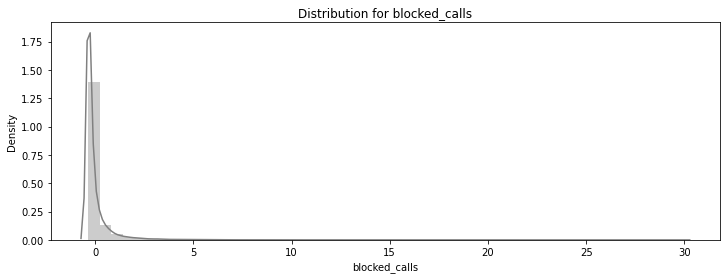

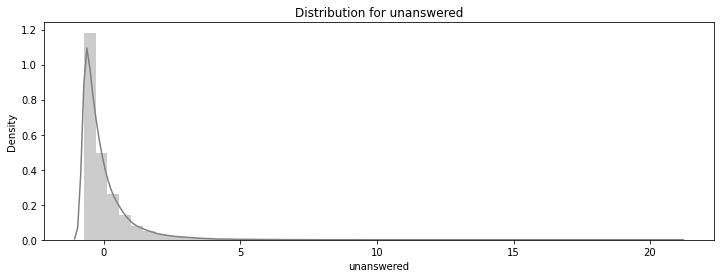

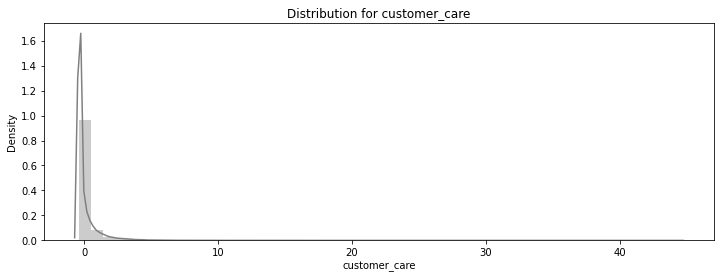

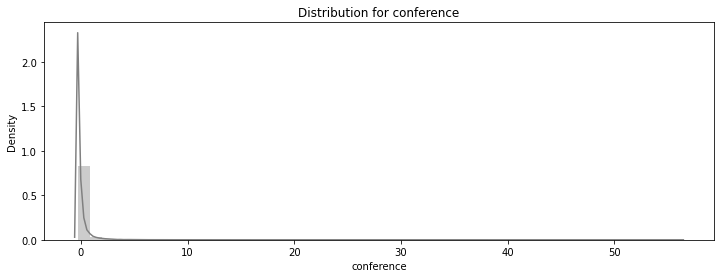

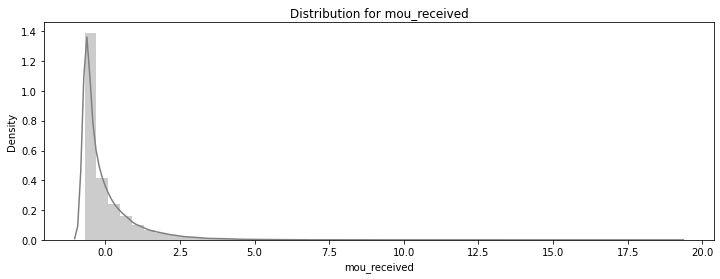

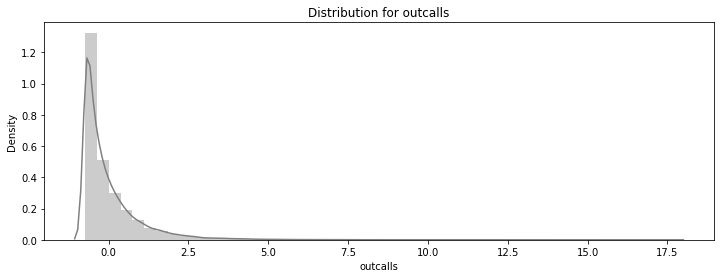

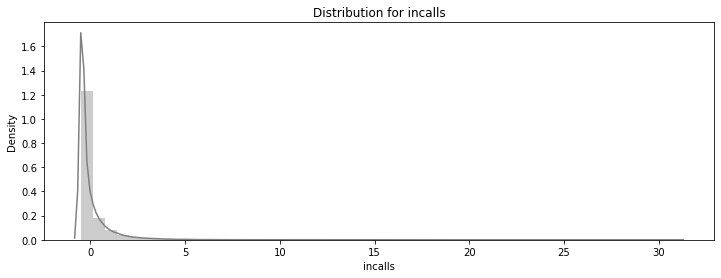

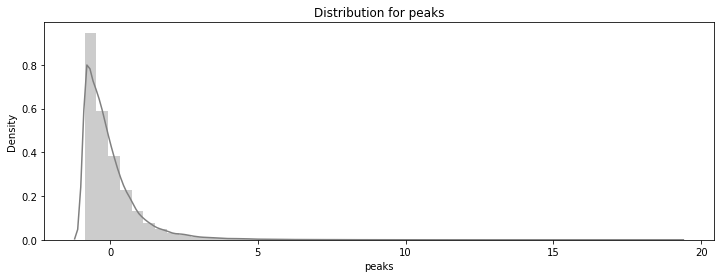

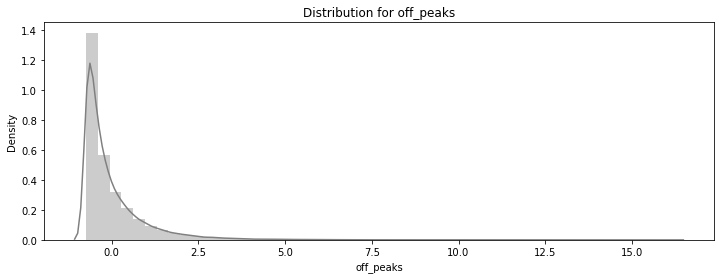

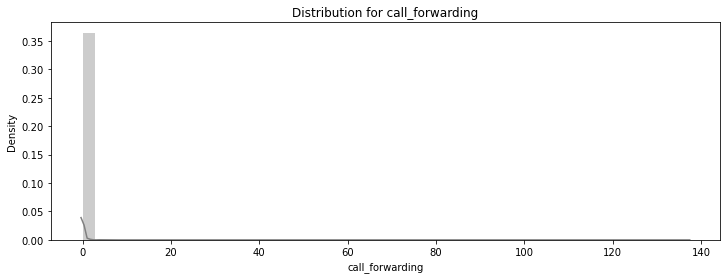

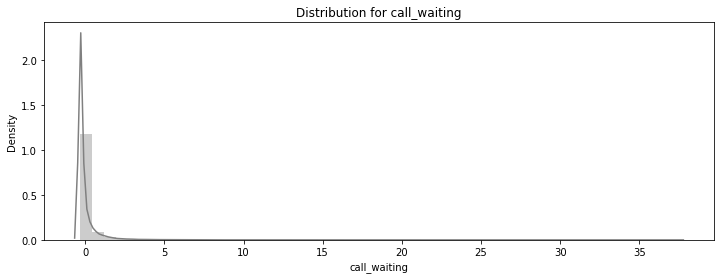

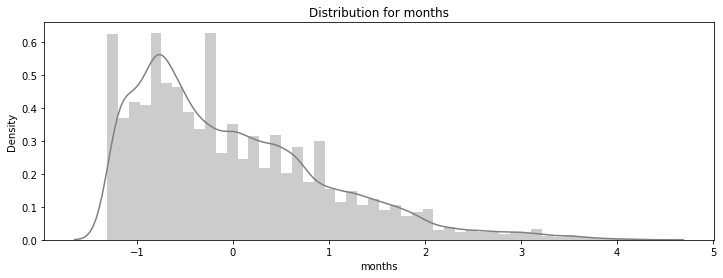

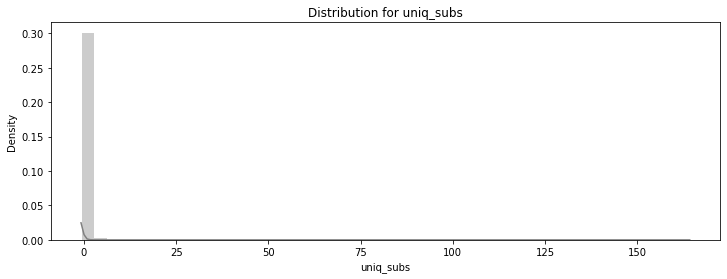

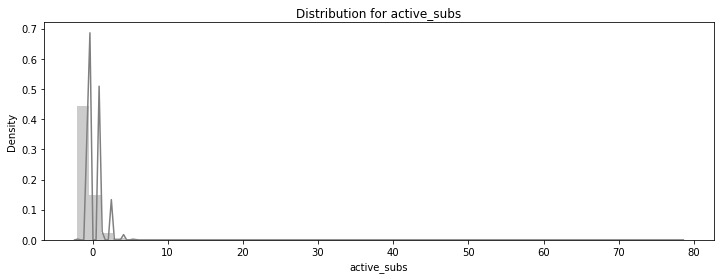

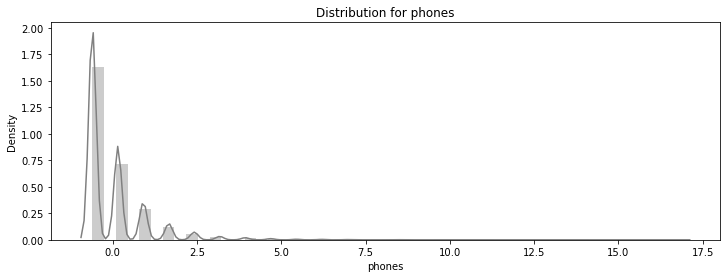

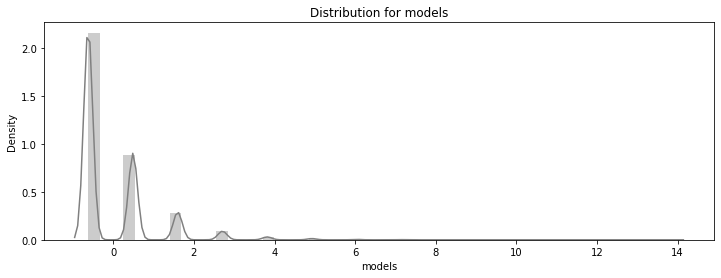

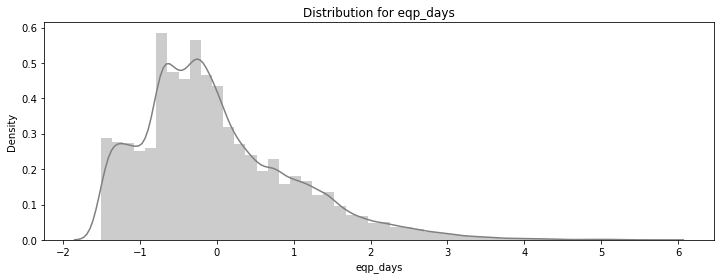

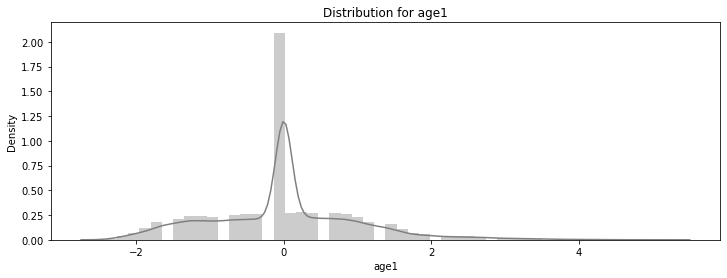

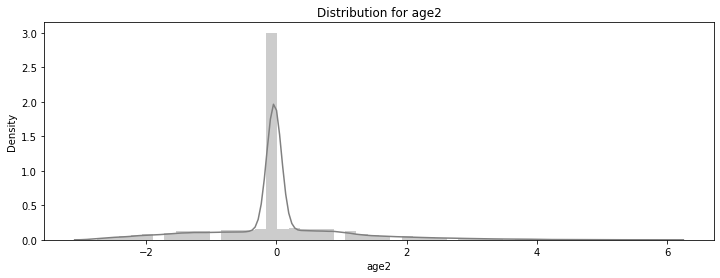

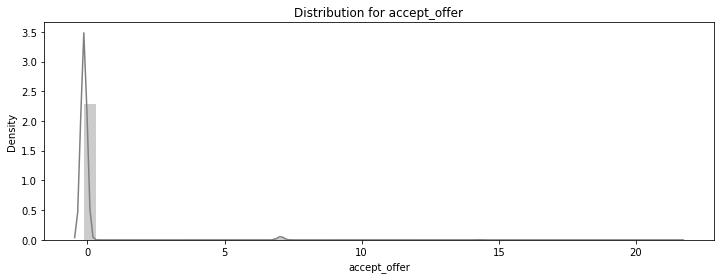

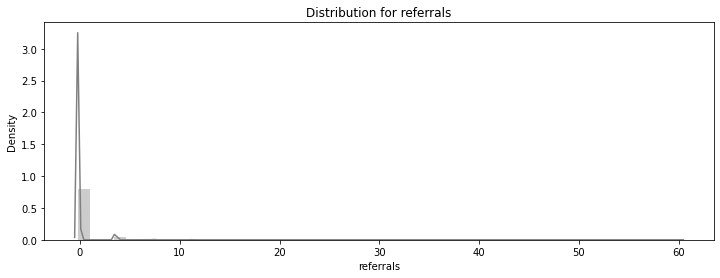

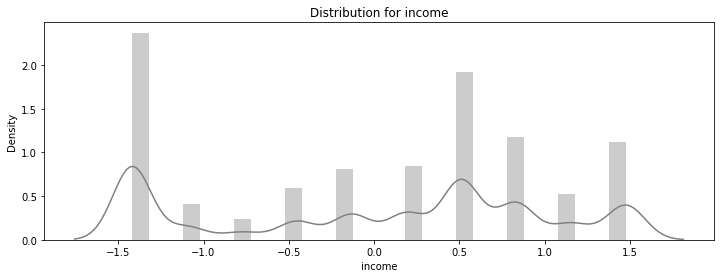

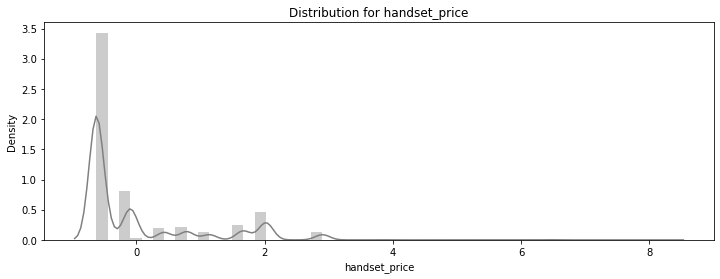

In [23]:
# StandardScaler
features = x.columns.values
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

for feat in list(numerical_df): 
    distplot(feat, x, color='gray')

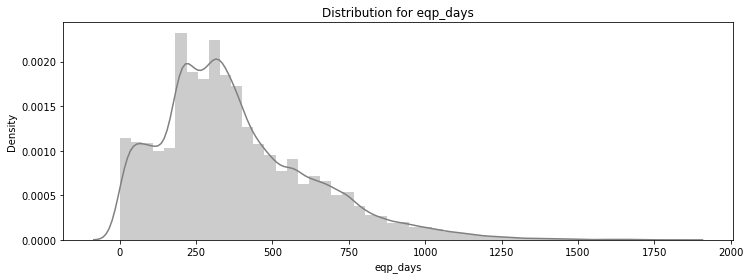

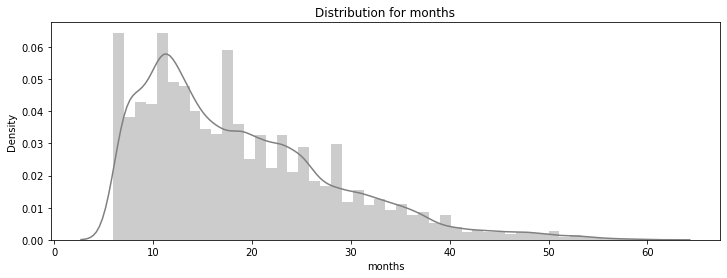

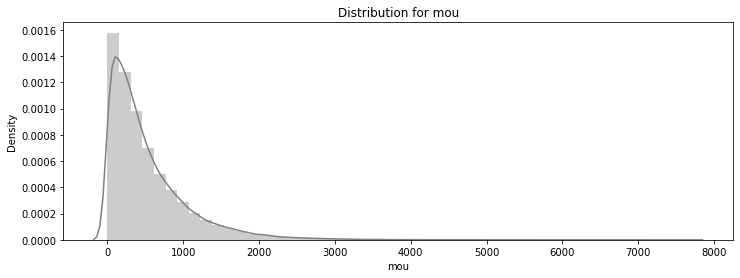

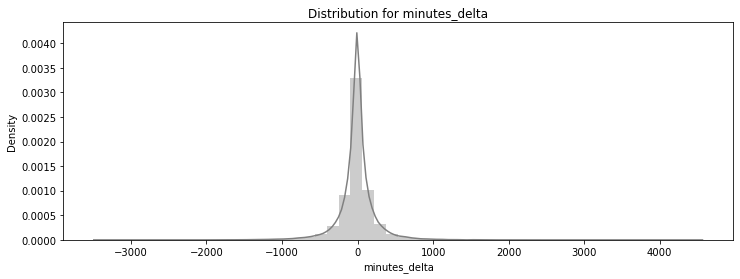

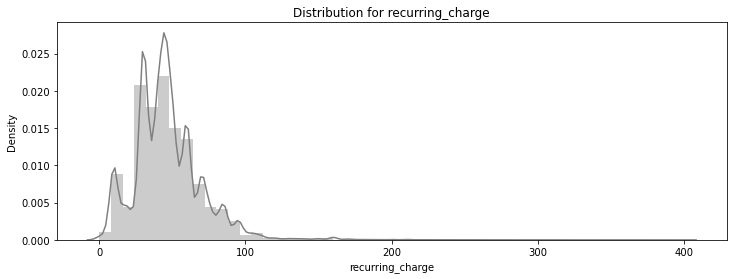

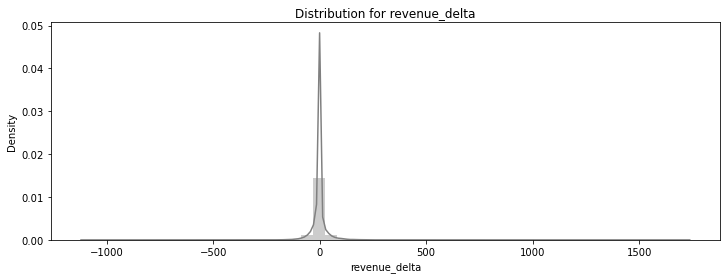

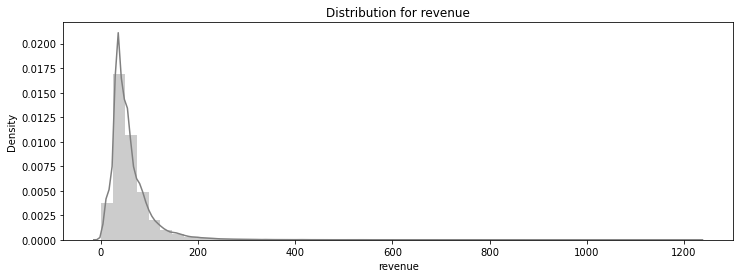

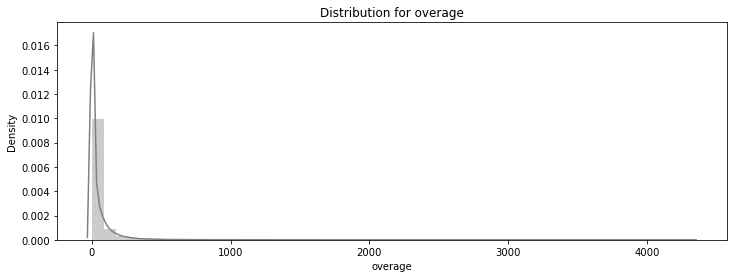

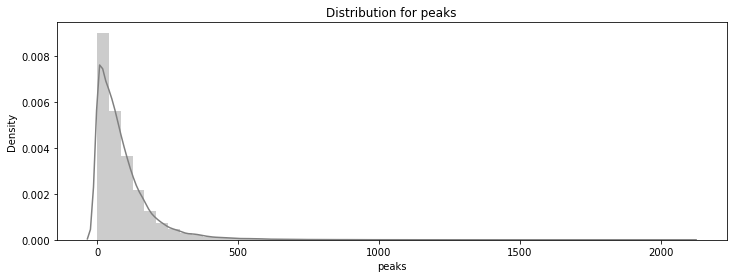

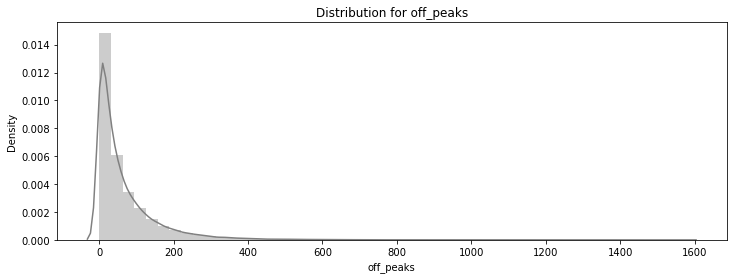

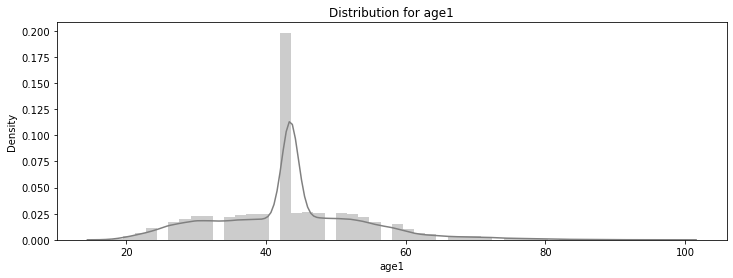

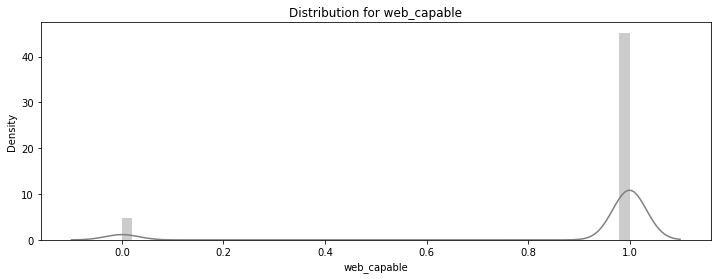

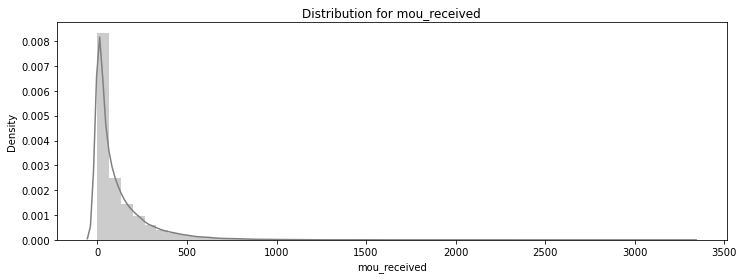

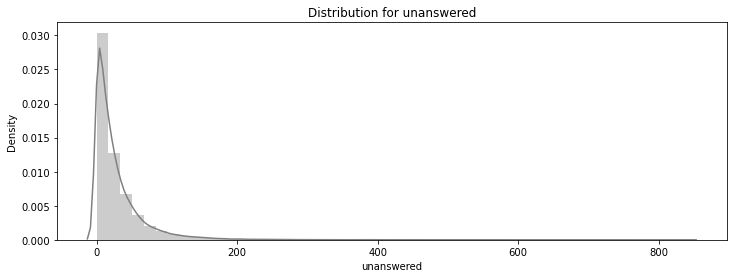

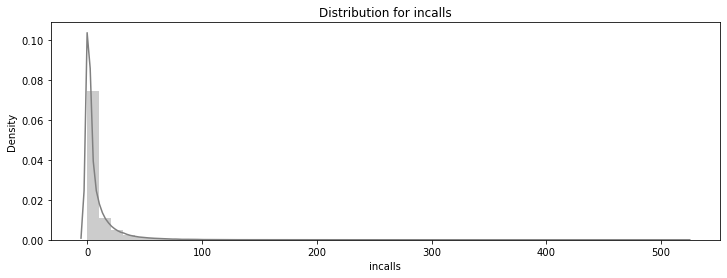

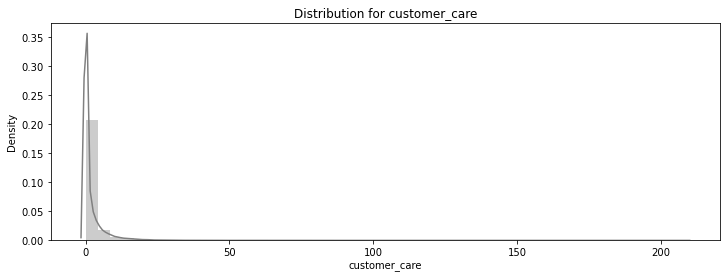

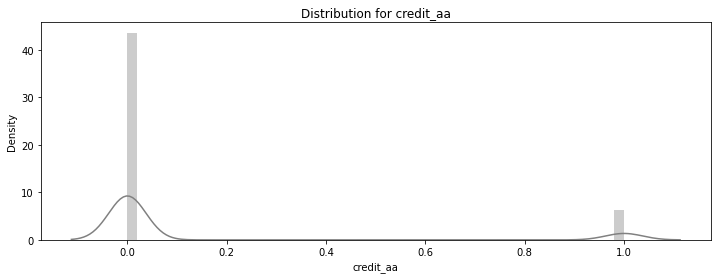

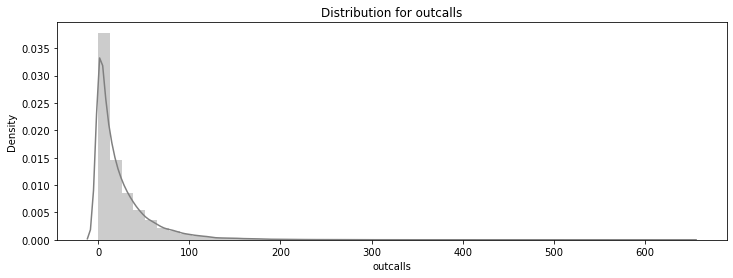

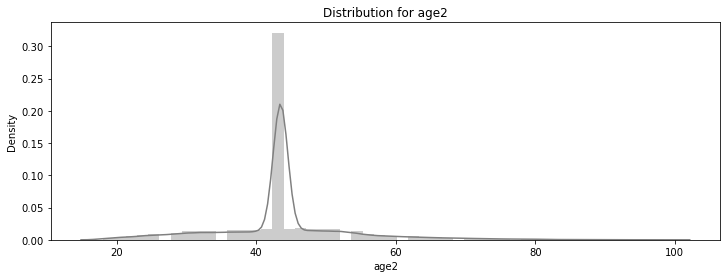

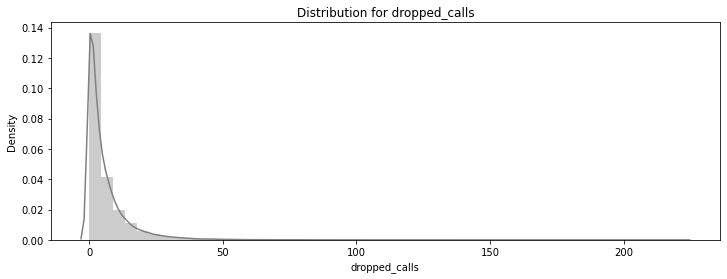

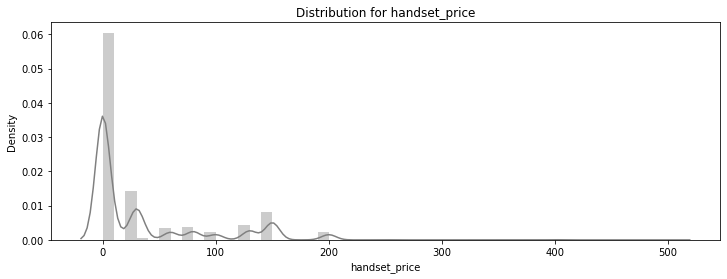

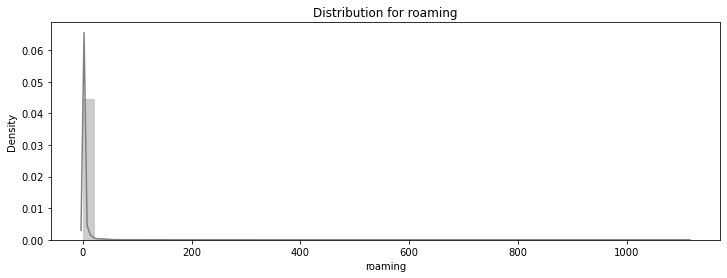

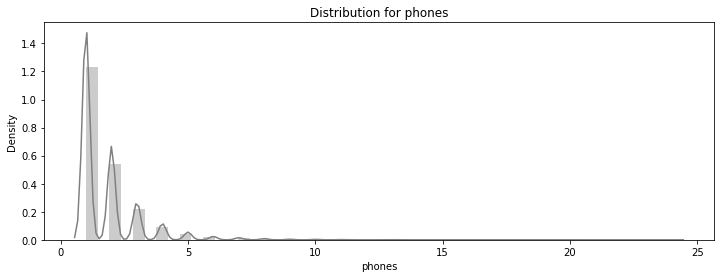

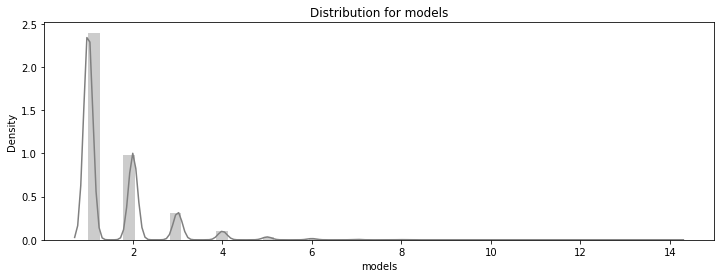

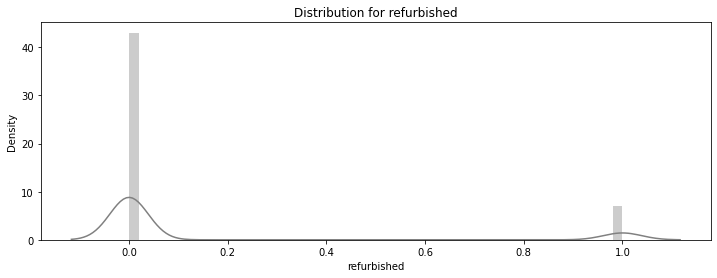

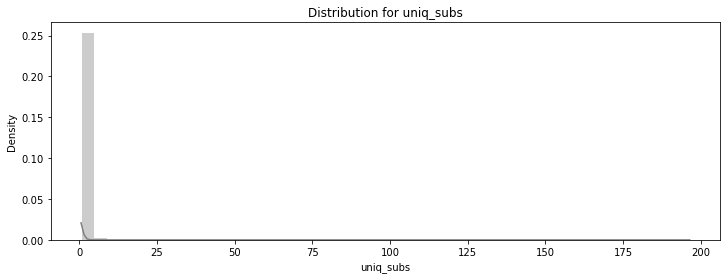

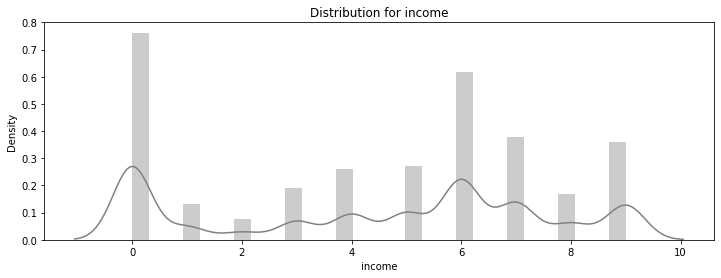

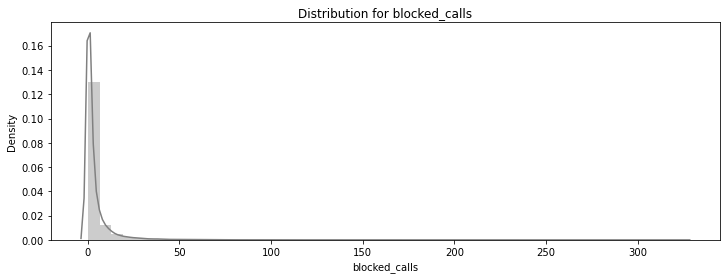

In [24]:
# StandardScalerIMP
features = x_imp.columns.values
scaler = StandardScaler()
scaler.fit(x_imp)
x_imp = pd.DataFrame(scaler.transform(x_imp))
x_imp.columns = features

for feat in list(df_imp_fea): 
    distplot(feat, df_imp_fea, color='gray')

## 3.4 Split Data

In [25]:
# Splitting data (with stratification to remain same distribution)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, random_state=101)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(x_imp, y_imp, test_size=0.3,stratify = y_imp, random_state=101)

## 3.5 PCA Projection

In [26]:
# pca = PCA(n_components = 3)
# principalComponents = pca.fit_transform(X_train)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['PC 1', 'PC 2', 'PC 3'])
# df_pca = pd.concat([principalDf, df_clean[['churn']]], axis = 1)
# df_pca.dropna(inplace=True)

In [27]:
# pca.explained_variance_ratio_ , pca.explained_variance_ratio_.sum()

## 3.6 Transformations to Deal with Imbalance

In [28]:
def scatterplot(df, x ='mou', y = 'eqp_days', hue = 'churn'):
    ax = sns.scatterplot(data = df, x = x, y = y, hue = 'churn')
    
def churn_catplot(df):
    ax = sns.catplot(y="churn", kind="count", data=df, height=3, aspect=2.5, orient='h')

In [29]:
# Oversampling the Data
smote = SMOTE(random_state = 101)
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)
X_imp_oversampled, y_imp_oversampled = smote.fit_resample(X_imp_train, y_imp_train)

In [30]:
# SMOTEENN the Data
smote_enn = SMOTEENN(random_state = 0)
X_undersampled, y_undersampled = smote_enn.fit_resample(X_train, y_train)
X_imp_undersampled, y_imp_undersampled = smote_enn.fit_resample(X_imp_train, y_imp_train)

In [31]:
# Borderline-SMOTE SVM
svmsmote = SVMSMOTE(random_state = 0)
X_svmsmote, y_svmsmote = svmsmote.fit_resample(X_train, y_train)
X_imp_svmsmote, y_imp_svmsmote = svmsmote.fit_resample(X_imp_train, y_imp_train)

In [32]:
# SMOTETomek sampling the Data
smote_tomek = SMOTETomek(random_state = 0)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
X_imp_smote_tomek, y_imp_smote_tomek = smote_tomek.fit_resample(X_imp_train, y_imp_train)

In [33]:
# # PCA on oversampling data
# pca = PCA(n_components = 3)
# principalComponents = pca.fit_transform(X_oversampled)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['PC 1', 'PC 2', 'PC 3'])
# df_pca_SMOTE = pd.concat([principalDf, y_oversampled], axis = 1)
# df_pca_SMOTE.dropna(inplace=True)

In [34]:
# Creating oversampleing df
df_oversampler = pd.DataFrame(X_oversampled)
df_oversampler['churn'] = y_oversampled
df_oversampler.name = 'df_oversampler'

# Creating undersamleing df
df_undersampler = pd.DataFrame(X_undersampled)
df_undersampler['churn'] = y_undersampled
df_undersampler.name = 'df_undersampler'

# Creating a svmsmote sampling df
df_svmsmote = pd.DataFrame(X_svmsmote)
df_svmsmote['churn'] = y_svmsmote
df_svmsmote.name = 'df_svmsmote'

# Creating a Hybrid sampling df
df_hybridsampler = pd.DataFrame(X_smote_tomek)
df_hybridsampler['churn'] = y_smote_tomek
df_hybridsampler.name = 'df_hybridsampler'

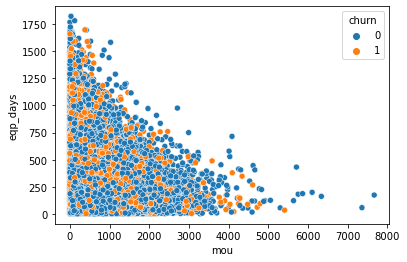

In [35]:
# Compare oversampling df with original df
scatterplot(df_clean)

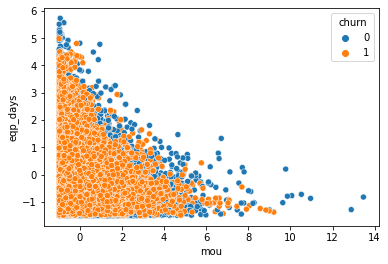

In [36]:
scatterplot(df_oversampler)

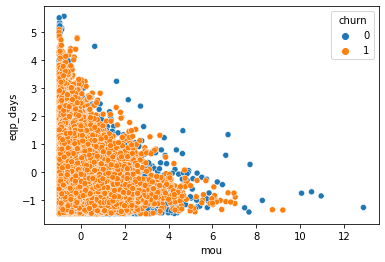

In [37]:
scatterplot(df_undersampler)

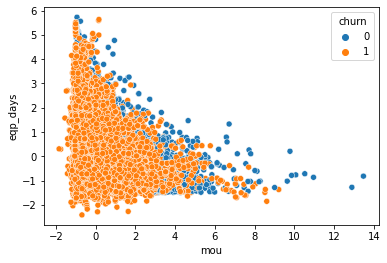

In [38]:
scatterplot(df_svmsmote)

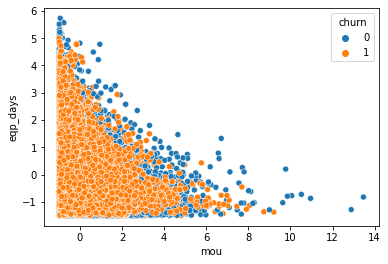

In [39]:
scatterplot(df_hybridsampler)

In [41]:
# scatterplot(df_pca, 'PC 1', 'PC 2')

In [42]:
# scatterplot(df_pca_SMOTE, 'PC 1', 'PC 2')

NameError: name 'df_pca_SMOTE' is not defined

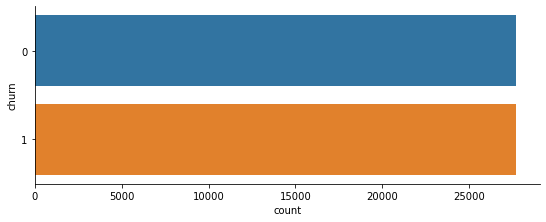

In [43]:
churn_catplot(df_oversampler)

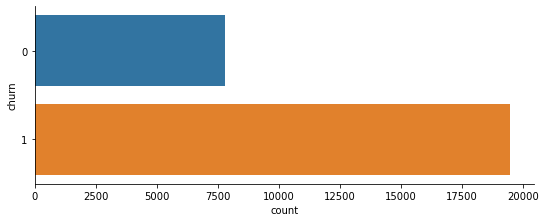

In [44]:
churn_catplot(df_undersampler)

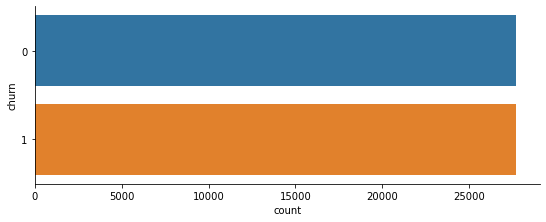

In [45]:
churn_catplot(df_svmsmote)

In [ ]:
churn_catplot(df_hybridsampler)

In [ ]:
# churn_catplot(df_pca_SMOTE)

# 4. Model Fitting

In [ ]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            classifier = LogisticRegression(C = c_param, class_weight=None, dual=False, fit_intercept=True,
                                    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                    verbose=0, warm_start=False)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            classifier.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred = classifier.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c


    
def logistic_regression(X_train, y_train, X_test, y_test, C=1.0):
    classifier = LogisticRegression(C=C, class_weight=None, dual=False, fit_intercept=True,
                                    intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                    verbose=0, warm_start=False)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()
    
    
    
    

def XGB(X_train, y_train, X_test, y_test):
    classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,verbosity=0,
                                colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                                max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                                n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()
    

def RFClassifier(X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators = 100, random_state = 123,
                                        max_depth = 9, criterion = "gini")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

    
def KNN(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

    
def plot_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
%matplotlib inline

def benchmark(sampling_type,X,y):
    lr = LogisticRegression()
    param_grid = {'C':[0.01,0.1,1,10,100]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
    gs = gs.fit(X.values,y.values.ravel())
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,y_resampled = transformer.fit_resample(X.values,y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

## 4.1 Baseline Model

In [ ]:
# Train with imbalanced data
logistic_regression(X_train, y_train, X_test, y_test)

In [ ]:
XGB(X_train, y_train, X_test, y_test)

## 4.2 Resampled Model Fit

### df_svmsmote fits better for logisticRegression

In [ ]:
# Train with resampled data
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    logistic_regression(X_train, y_train, X_test, y_test)

### XGB leans towards majority class too much.

In [ ]:
# Train with resampled data
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    XGB(X_train, y_train, X_test, y_test)

### KNN Fits poorly

In [ ]:
# Train with resampled data
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    KNN(X_train, y_train, X_test, y_test)

### RandomForest fits best by far, df_undersampler has a good recall, acceptable f1 and ROC AUC

In [ ]:
params = {'random_state': 123, 'n_jobs': 4, 'n_estimators': 1500, 'max_depth': 10}
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    classifier = RandomForestClassifier(**params)
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

### Recalls all too low from Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

params = {'random_state': 101}
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    classifier = BaggingClassifier(**params)
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

In [ ]:
from lightgbm import LGBMClassifier

for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    classifier = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                                learning_rate=0.5, max_depth=7, min_child_samples=20,
                                min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                                n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0)
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

### Tree also fits well with df_undersampler, but ROC AUC is slightly lower comparing to RF

In [ ]:
from sklearn.tree import DecisionTreeClassifier

for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    classifier = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


params = {'random_state': 124}
for df in [df_oversampler, df_undersampler, df_svmsmote, df_hybridsampler]:
    X_train = df.iloc[:,:-1]
    y_train = df['churn']
    print("Classification report for {}".format(df.name))
    classifier = GradientBoostingClassifier(**params)
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)
    
    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))
    
    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

As shown above in the metrics, the bias in imbalanced dataset caused our model tends to predict 0 than 1. Oversampled data on the other hand helped to bring recall for class 1 to an acceptable level.



## 4.3 Model performance and parameter tuning

### 4.31 Run two baseline models

In [ ]:
classifier_dic = {
    "RF": RandomForestClassifier(n_estimators = 1500, random_state = 123,
                                 max_depth = 10, n_jobs = 4, criterion = "gini"),
    "GBC": GradientBoostingClassifier(random_state=124)
}
for i in classifier_dic.values():
    X_train = df_undersampler.iloc[:,:-1]
    y_train = df_undersampler['churn']
    print("Classification report for df_undersampler")
    classifier = i
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)

    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))

    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

In [ ]:
classifier_dic = {
    "RF": RandomForestClassifier(n_estimators = 750, random_state = 123,
                                 max_depth = 25, criterion = "gini"),
    "GBC": GradientBoostingClassifier(random_state=124)
}
for i in classifier_dic.values():
    X_train = df_undersampler.iloc[:,:-1]
    y_train = df_undersampler['churn']
    print("Classification report for df_undersampler")
    classifier = i
    clf = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    print(classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    log_fpr, log_tpr, _ = roc_curve(y_test,  y_pred_proba)

    # Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # Heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Scores
    print("F1 Score:",f1_score(y_test, y_pred))
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print("ROC AUC:",roc_auc_score(y_test, y_pred_proba))

    # ROC Curve
    plot_roc_curve(log_fpr, log_tpr)
    plt.show()

### 4.32 Tuning n_estimators and Learning rate

In [ ]:
p_test3 = {
    'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
    'n_estimators':[100,250,500,750,1000,1250,1500,1750]
}

tuning = GridSearchCV(
    estimator = GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, 
                                           subsample=1,max_features='sqrt', random_state=10), 
    param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

### 4.33 Tuning Max Depth

In [ ]:
p_test2 = {
    'max_depth':[2,3,4,5,6,7]
}
tuning = GridSearchCV(
    estimator = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, 
                                           min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
    param_grid = p_test2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [ ]:
datasets = []
datasets.append(("base",X_train,y_train))
datasets.append(transform(SMOTE(n_jobs=-1),X_train,y_train))
datasets.append(transform(SVMSMOTE(),X_train,y_train))
datasets.append(transform(SMOTEENN(),X_train,y_train))
datasets.append(transform(SMOTETomek(),X_train,y_train))
datasets.append(transform(NearMiss(n_jobs=-1),X_train,y_train))
datasets.append(transform(RandomUnderSampler(),X_train,y_train))
datasets.append(transform(RandomOverSampler(),X_train,y_train))

In [ ]:
# Determine best hyperparameters
benchmark_scores = []
for sample_type,X,y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,y))
    print('______________________________________________________________')

In [ ]:
benchmark_scores